<img src='logo_DH.png' align='center' width=35%/>

<h1 style="text-align: center;">Desafío 1 - Limpieza de datos</h1>

<a id="section_toc"></a> 
## Tabla de Contenidos

[Introducción y objetivos](#section_intro)

[Importación de librerías y confguración de display()](#section_importacion)

[Importación del archivo properati](#section_properati)

[Inspección de la tabla sin limpieza previa](#section_inspeccion)

[Creación de función general para el análisis de columnas y sus valores](#section_creacion_de_funcion)

$\hspace{.5cm}$[Funcion my_info_columnas()](#section_funcion_1)
  
$\hspace{.5cm}$[Funcion my_colmnas_valores()](#section_funcion_2)

[Eliminacion de columnas redundantes](#section_eliminacion)


[Análisis de las variables más importantes](#section_analisis_var)

[Imputacion de valores faltante por medio de otro campo o estadístico de grupo](#section_imputacion)

[Diagrama de expensas para los valores existentes](#section_expensas)

[Gráficos variables categóricas](#section_categorizacion)

[Gráficos variables contínua](#section_graficos)

[Archivo para desafío 2](#section_desafio_2)

---
<a id="section_intro"></a> 
## Introducción y objetivos

[volver a TOC](#section_toc)

La inmobiliaria Properati publica periódicamente información sobre ofertas de propiedades para venta y alquiler. Debemos asesorar a la inmobiliaria para desarrollar un modelo de regresión que permita predecir el **precio por metro cuadrado** de una propiedad. 

El objetivo final es que el modelo que desarrollen sea utilizado como **tasador automático** a ser aplicados a las próximas propiedades que sean comercializadas por la empresa. Para ello la empresa le provee de un dataset correspondiente al primer semestre de 2017. El nombre del dataset es *properati.csv*.

Para eso deberemos:
- Efectuar una limpieza del dataset provisto. Particularmente, debemos diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
- Realizar un análisis descriptivo de las principales variables.
- Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

---
<a id="section_importacion"></a> 
## Importación de librerías y configuración de display()

[volver a TOC](#section_toc)


En esta parte importamos las librerías que usamos y cambiamos la configuración para tener un display/print correctos/útiles

In [519]:
# Importación de librerias:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [387]:
# Configuraciones de display:
pd.set_option("display.max_columns", 50)   # Limita la visualización a max 50 columnas. Si se excede genera "...".NO existe display.min_columns
pd.set_option("display.max_rows", 20)     # Limita la visualización a max 20 columnas. Si se excede genera "..."
pd.set_option("display.min_rows", 10)      # Una vez que display.max_rows se excede, la display.min_rows determina cuántas filas se muestran.
#pd.reset_option("^display")               # Este comando resetea todas las opciones por defecto.

---
<a id="section_properati"></a> 
## Importación del archivo properati.csv

[volver a TOC](#section_toc)

In [388]:
# Importación del archivo de Properati:
data = pd.read_csv("properati.csv", sep = ",", low_memory=False) # low_memory=False es para que lea el archivo con la mayor cantidad de memoria dsponible y no infiera "mal" un tipo de dato.

In [389]:
# Muestra de la tabla:
data.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
40230,40230,sell,store,Bahía Blanca,|Argentina|Buenos Aires Interior|Bahía Blanca|,Argentina,Buenos Aires Interior,3865084.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/18qwn_venta_local_...,Hermoso local en venta en calle Brandsen esqui...,Local en Venta Bransen esquina San Martín,https://thumbs4.properati.com/5/6jYstwzkGinWb5...
95252,95252,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,NaN,NaN,NaN,3900000.0,ARS,3859316.72,218726.33,NaN,330.0,NaN,11818.181818,NaN,NaN,NaN,http://www.properati.com.ar/1bgu5_venta_casa_r...,"Casa con Agua Corriente, Santa Fe, Rosario, po...",San Luis 3300. Casa en venta 5 habitaciones. M...,https://thumbs4.properati.com/1/4RIVRAyypZrPGs...
119939,119939,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.918219,-57.942501",-34.918219,-57.942501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,http://www.properati.com.ar/1chax_venta_depart...,Corredor Responsable: Marcelo Di Girolamo - C....,Departamento Semipiso 2 dormitorios venta La P...,https://thumbs4.properati.com/9/7Nbz7UqtSkNraz...
55735,55735,sell,apartment,Villa Celina,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,NaN,"-34.7041978,-58.4953468",-34.704198,-58.495347,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19pjp_venta_depart...,CODIGO: 3403-VDC1 ubicado en: Boulogne Sur Mer...,VENDO DEPARTAMENTO EN VILLA CELINA BARRIO PLAN...,https://thumbs4.properati.com/8/2oh_7mgZEVxage...
30328,30328,sell,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.455333,-58.861549",-34.455333,-58.861549,74000.0,USD,1305693.00,74000.00,NaN,41.0,NaN,1804.878049,NaN,1.0,NaN,http://www.properati.com.ar/1814z_venta_depart...,Corredor Responsable: Lucrecia Saulle - CSI 55...,"Departamento,venta,Campus Vista Pilar,oportuni...",https://thumbs4.properati.com/8/HxkskTXJYkpzX4...


---
<a id="section_inspeccion"></a> 
## Inspección de la tabla sin limpieza previa

[volver a TOC](#section_toc)

Se realiza un análisis básico para entender los datos e información que almacena la tabla:

In [390]:
# Dimensiones:
print("Dimensiones de la tabla: ", data.shape)

Dimensiones de la tabla:  (121220, 26)


In [391]:
# Tipo de datos de las columnas:
data.dtypes

Unnamed: 0                   int64
operation                   object
property_type               object
place_name                  object
place_with_parent_names     object
                            ...   
expenses                   float64
properati_url               object
description                 object
title                       object
image_thumbnail             object
Length: 26, dtype: object

Analizando las columnas una a una podemos ver que los tipos de datos son los correctos segun muestra el df.

In [392]:
# Nombre de las columnas:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [393]:
# Para evitar inconvenientes en el análisis pasamos todos los strings a uppercase():
data = data.applymap(lambda x: x.upper() if type(x) == str else x)
display(data.sample(10))

# Revisamos que no se alteraron los tipos de datos:
data.dtypes

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
40010,40010,SELL,APARTMENT,LA PERLA,|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DE...,ARGENTINA,BUENOS AIRES COSTA ATLÁNTICA,NaN,"-37.9956715024,-57.5480366126",-37.995672,-57.548037,120000.0,USD,2117340.0,120000.0,70.0,70.0,1714.285714,1714.285714,NaN,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/18PWO_VENTA_DEPART...,"VENTA DE DEPARTAMENTO 3 AMBIENTES EN LA PERLA,...",DEPARTAMENTO EN VENTA,HTTPS://THUMBS4.PROPERATI.COM/4/KUDHIWRSJ-QYS8...
66062,66062,SELL,HOUSE,CÓRDOBA,|ARGENTINA|CÓRDOBA|CÓRDOBA|,ARGENTINA,CÓRDOBA,3860259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,580.0,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1ADAR_VENTA_CASA_C...,ESTA HERMOSA PROPIEDAD SE EMPLAZA EN EL CORAZÓ...,CASA - ARGUELLO,HTTPS://THUMBS4.PROPERATI.COM/5/ZDQBWU4OUAXJ3B...
54788,54788,SELL,HOUSE,MAR DEL PLATA,|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DE...,ARGENTINA,BUENOS AIRES COSTA ATLÁNTICA,3430863.0,"-38.0903594,-57.5721076",-38.090359,-57.572108,125000.0,USD,2205562.5,125000.0,420.0,NaN,297.619048,NaN,NaN,4.0,NaN,HTTP://WWW.PROPERATI.COM.AR/19NT9_VENTA_CASA_M...,"CHALET EN EL BOSQUE PERALTA RAMOS, UBICADO EN ...",CHALET A LA VENTA 3 DORMITORIOS BOSQUE PERALTA...,HTTPS://THUMBS4.PROPERATI.COM/7/DMKC8GOI5QMZV6...
35467,35467,SELL,HOUSE,BENAVIDEZ,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|BENA...,ARGENTINA,BS.AS. G.B.A. ZONA NORTE,3436048.0,NaN,NaN,NaN,350000.0,USD,6175575.0,350000.0,900.0,205.0,388.888889,1707.317073,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/18EJM_VENTA_CASA_B...,VENTA CON RENTA HASTA SEPTIEMBRE 2017.HERMOSA ...,"CASA 900M² CON 2 PLANTAS, TIGRE, BENAVIDEZ, PO...",HTTPS://THUMBS4.PROPERATI.COM/7/RRQ_JNVFSHP3MI...
68612,68612,SELL,HOUSE,ADROGUÉ,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|ALMIRANTE BR...,ARGENTINA,BS.AS. G.B.A. ZONA SUR,NaN,NaN,NaN,NaN,630000.0,USD,11116035.0,630000.0,NaN,476.0,NaN,1323.529412,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1AH3Q_VENTA_CASA_A...,"PB: CON PISOS TARUGADOS, AMPLIA , TOILLETE, C...",CHALET EN ADROGUE,HTTPS://THUMBS4.PROPERATI.COM/6/0QZ9KDZKBAR-GC...
1013,1013,SELL,HOUSE,BURZACO,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|ALMIRANTE BR...,ARGENTINA,BS.AS. G.B.A. ZONA SUR,3435894.0,"-34.8269961,-58.4016469",-34.826996,-58.401647,95000.0,USD,1676227.5,95000.0,240.0,81.0,395.833333,1172.839506,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15GWU_VENTA_CASA_B...,CODIGO: 64 UBICADO EN: BRADLEY 1491 - PUBLICA...,CASA CON RENTA,HTTPS://THUMBS4.PROPERATI.COM/5/JZL5NCFYQVYSMI...
53786,53786,SELL,APARTMENT,LA PLATA,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LA PLATA|LA ...,ARGENTINA,BS.AS. G.B.A. ZONA SUR,3432039.0,"-34.916235,-57.979102",-34.916235,-57.979102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/19M0D_VENTA_DEPART...,CORREDOR RESPONSABLE: PABLO DI GIROLAMO - CDCP...,DEPARTAMENTO DE UN DORMITORIO CON COCHERA,HTTPS://THUMBS4.PROPERATI.COM/3/P0ZB5BS9QDXEH8...
67699,67699,SELL,APARTMENT,LOMAS DE ZAMORA,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LOMAS DE ZAM...,ARGENTINA,BS.AS. G.B.A. ZONA SUR,3431270.0,NaN,NaN,NaN,75000.0,USD,1323337.5,75000.0,35.0,35.0,2142.857143,2142.857143,NaN,NaN,1500.0,HTTP://WWW.PROPERATI.COM.AR/1AFO5_VENTA_DEPART...,DEPARTAMENTO DE DOS AMBIENTES: LIVING COMEDOR ...,DEPARTAMENTO - LOMAS DE ZAMORA,HTTPS://THUMBS4.PROPERATI.COM/7/2Z2PERLVKS9JE_...
108326,108326,SELL,HOUSE,TIGRE,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|,ARGENTINA,BS.AS. G.B.A. ZONA NORTE,3427753.0,NaN,NaN,NaN,580000.0,USD,10233810.0,580000.0,NaN,371.0,NaN,1563.342318,NaN,NaN,4200.0,HTTP://WWW.PROPERATI.COM.AR/1BZV6_VENTA_CASA_T...,EXCELENTE CASA AL RIO EN UNO DE LOS BARRIOS MA...,CASA - SAN MARCO,HTTPS://THUMBS4.PROPERATI.COM/6/YNV8S79W4BP4TY...
109542,109542,SELL,APARTMENT,PALERMO,|ARGENTINA|CAPITAL FEDERAL|PALERMO|,ARGENTINA,CA

Unnamed: 0                   int64
operation                   object
property_type               object
place_name                  object
place_with_parent_names     object
                            ...   
expenses                   float64
properati_url               object
description                 object
title                       object
image_thumbnail             object
Length: 26, dtype: object

In [394]:
# Porcentaje de nulos por columnas:
(data.isnull().sum()/data.shape[0]*100).round(2)

Unnamed: 0                  0.00
operation                   0.00
property_type               0.00
place_name                  0.02
place_with_parent_names     0.00
                           ...  
expenses                   88.23
properati_url               0.00
description                 0.00
title                       0.00
image_thumbnail             2.57
Length: 26, dtype: float64

In [395]:
# Información general:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [396]:
# De las columnas numéricas podemos obtener ciertas estadísticas, excluyendo los valores NaN:
data.describe().round(2)

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.00,102503.00,69670.00,69670.00,1.008100e+05,1.008100e+05,100810.00,81892.00,101313.00,68617.00,87658.00,7899.00,47390.00,14262.00
mean,60609.50,3574442.32,-34.63,-59.27,4.685259e+05,4.229397e+06,239700.58,233.80,133.05,2160.09,6912.22,17.45,3.08,5009.23
std,34993.34,354130.62,1.98,2.30,2.260101e+06,6.904714e+06,391323.88,1782.22,724.35,2759.29,28378.64,120.24,1.86,120440.26
min,0.00,3427208.00,-54.82,-75.68,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.60,1.51,1.00,1.00,1.00
25%,30304.75,3430234.00,-34.67,-58.73,1.100000e+05,1.583309e+06,89733.88,50.00,45.00,1218.18,1550.00,1.00,2.00,1000.00
50%,60609.50,3433910.00,-34.60,-58.48,1.850000e+05,2.558452e+06,145000.00,84.00,75.00,1800.00,2213.11,3.00,3.00,2000.00
75%,90914.25,3836668.00,-34.44,-58.40,4.200000e+05,4.675792e+06,265000.00,200.00,150.00,2486.41,3355.55,6.00,4.00,4000.00
max,121219.00,6948895.00,4.55,-53.73,6.500000e+08,8.212711e+08,46545445.00,200000.00,187000.00,206333.33,3999999.96,3150.00,32.00,10001500.00


In [397]:
# De las columnas NO numéricas (categóricas) podemos obtener ciertas estadísticas también:
data.describe(include=['object', 'bool'])      # Se especifica el tipo de dato a analizar.

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,currency,properati_url,description,title,image_thumbnail
count,121220,121220,121197,121220,121220,121220,69670,100809,121220,121218,121220,118108
unique,1,4,1060,1164,1,28,47203,4,121220,104004,71654,114389
top,SELL,APARTMENT,CÓRDOBA,|ARGENTINA|SANTA FE|ROSARIO|,ARGENTINA,CAPITAL FEDERAL,"-34.4026444,-58.6684776",USD,HTTP://WWW.PROPERATI.COM.AR/19Z1V_VENTA_DEPART...,AVISO LEGAL: LAS DESCRIPCIONES ARQUITECTÓNICAS...,DEPARTAMENTO EN VENTA,HTTPS://THUMBS4.PROPERATI.COM/5/YYMIU8BHQI9KXC...
freq,121220,71065,9254,8504,121220,32316,312,87587,1,358,5025,255


---
<a id="section_creacion_de_funcion"></a> 
## Creación de función general para el análisis de columnas y sus valores

[volver a TOC](#section_toc)

Creamos una función que nos permite analizar rápidamente las columnas (valores nulos y no nulos) y otra que nos permte analizar los valores dentro de esa columna (value_counts)

<a id="section_funcion_1"></a> 
#### Función my_info_columnas()

[volver a TOC](#section_toc)

In [398]:
# Creamos una función que nos devuelve info de sus columnas. Recibe el dataframe y un argumento que indica si analizamos solo las columnas con algún valor NaN o todas.
def my_info_columnas(data, solo_nan='si'):
    data_null = data.isnull().sum()                                                                               # Df de elementos nulos.
    data_null_porc = (100*data_null/len(data)).round(2)                                                           # Df de elementos nulos %.
    data_null_concat = pd.concat([data_null, data_null_porc], axis=1)                                             # Concatena los df anteriores.
    data_null_ok = data_null_concat.rename(columns = {0 : 'Cantidad de NaN', 1 : '% de NaN'})                     # Renombra las columnas del df anterior.
    data_null_ok['Dtype'] = data.dtypes                                                                           # Pego el tipo de dato al df anterior.
    
    dict_unique_size = {}                                                                                         # Creao diccionario vacio.
    for col in data:                                                                                              # Quiero pegarle los valores únicos de cada columna.
        dict_unique_size[col] = data[col].unique().size                                                           # key = nombre de col, values = cant de unicos.
    
    serie_unique_size = pd.Series(dict_unique_size)                                                               # Convierto del diccionario a serie.
    data_null_ok['Valores Unicos'] = serie_unique_size                                                            # Lo agrego como otra columna.

    if solo_nan == 'si':                                                                                           # Creo if para ver si analizo todas las columnas o solo las NaN.
        data_null_ok = data_null_ok[data_null_ok.iloc[:,0] != 0].sort_values('% de NaN', ascending=False)          # Filtra y ordeno las columnas con algún NaN.
    else:
         data_null_ok = data_null_ok.sort_values(by = ['% de NaN','Cantidad de NaN'] , ascending = [False, False]) # Filtra y ordeno las columnas con algún NaN.
    
    print("Tu dataframe tiene:")
    print(str((data.isnull().sum().sum()/data.size*100).round(2)) + "% de valores NaN en total.")
    print(str(data.shape[0]) + " filas")
    
    if solo_nan == 'si':
        print(str(data.shape[1]) + " columnas de las cuales " + str(data_null_ok.shape[0]) + " tienen valores NaN:")
    else:
        print(str(data.shape[1]) + " columnas:")

    display(data_null_ok)
    return

In [399]:
my_info_columnas(data, solo_nan='si')      # Llamamos a nuestra función. Para analizar TODAS las columnas pasamos nuestro df + solo_nan='no'

Tu dataframe tiene:
22.14% de valores NaN en total.
121220 filas
26 columnas de las cuales 18 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747


In [400]:
my_info_columnas(data, solo_nan='no')      # Llamamos a nuestra función. Para analizar TODAS las columnas pasamos nuestro df + solo_nan='no'

Tu dataframe tiene:
22.14% de valores NaN en total.
121220 filas
26 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat-lon,51550,42.53,object,47204
...,...,...,...,...
place_with_parent_names,0,0.00,object,1164
country_name,0,0.00,object,1
state_name,0,0.00,object,28
properati_url,0,0.00,object,121220


<a id="section_funcion_2"></a> 
#### Función my_columna_valores()

[volver a TOC](#section_toc)

In [401]:
# Creamos una función para analizar los valores de las diferentes columnas:
def my_columna_valores(data, col='todas'):                                                                       # Recibe el df y la columna a analizar.
    if col =='todas':
        for col in data:
            print("\nColumna: " + col + " ----------------------------------------------------\n")
            print("Cantidad de elementos únicos: ", data[col].unique().size)
            print(data[col].value_counts(dropna=False))
    else:
        print("Columna: " + col)
        print("Cantidad de elementos únicos: ", data[col].unique().size)
        print(data[col].value_counts(dropna=False))
    return

In [402]:
my_columna_valores(data, col='currency')        # Analizamos los valores de cada columna. Se le pasa el df + nombre de la columna. Si queremos todas, pasar 'todas'

Columna: currency
Cantidad de elementos únicos:  5
USD    87587
NaN    20411
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64


In [403]:
my_columna_valores(data, col='todas')


Columna: Unnamed: 0 ----------------------------------------------------

Cantidad de elementos únicos:  121220
2047     1
54576    1
29988    1
32037    1
25894    1
        ..
2772     1
725      1
6870     1
4823     1
0        1
Name: Unnamed: 0, Length: 121220, dtype: int64

Columna: operation ----------------------------------------------------

Cantidad de elementos únicos:  1
SELL    121220
Name: operation, dtype: int64

Columna: property_type ----------------------------------------------------

Cantidad de elementos únicos:  4
APARTMENT    71065
HOUSE        40268
PH            5751
STORE         4136
Name: property_type, dtype: int64

Columna: place_name ----------------------------------------------------

Cantidad de elementos únicos:  1061
CÓRDOBA                          9254
ROSARIO                          8504
MAR DEL PLATA                    6534
TIGRE                            3324
NORDELTA                         3315
                                 ... 
HELVECI

---
<a id="section_eliminacion"></a> 
## Eliminación de columnas redundantes

[volver a TOC](#section_toc)

Realizamos esta eliminación de columnas para poder optimizar el espacio de trabajo así como una mejor visualización de los datos necesarios
Por ejemplo la columna country_name siempre tiene el valor Argentina.

In [404]:
# Observando el dataframe notamos que Unnamed:  0 es igual al índice así que lo eliminamos.
data['Unnamed: 0']

0              0
1              1
2              2
3              3
4              4
           ...  
121215    121215
121216    121216
121217    121217
121218    121218
121219    121219
Name: Unnamed: 0, Length: 121220, dtype: int64

In [405]:
data.drop('Unnamed: 0', axis = 'columns', inplace=True)
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [406]:
# Vemos que operation y country_name toma un único valor para todo el df. Veamos cuales son:
my_columna_valores(data, col='operation')
my_columna_valores(data, col='country_name')

Columna: operation
Cantidad de elementos únicos:  1
SELL    121220
Name: operation, dtype: int64
Columna: country_name
Cantidad de elementos únicos:  1
ARGENTINA    121220
Name: country_name, dtype: int64


In [407]:
# Borremos la columna ya que son redundantes por lo menos por ahora:
data.drop(['operation', 'country_name'], axis = 'columns', inplace=True)
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

#### Análisis de columnas lat-lon, lat y lon

[volver a TOC](#section_toc)

El objetivo es eliminar columnas redundantes comparando si la información es la misma.

In [408]:
# Analicemos las columnas lat-lon con lat y lon por separado. Puede haber información redundante. Podemos prescindir de algunas columnas:
data_lat_lon = data[['lat-lon', 'lat', 'lon']]   # Nuevo df solo con estas columnas para su análisis.
data_lat_lon

,lat-lon,lat,lon
0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447
...,...,...,...
121215,NaN,NaN,NaN
121216,NaN,NaN,NaN
121217,"-34.5706388726,-58.4755963355",-34.570639,-58.475596
121218,NaN,NaN,NaN


In [409]:
# Analizo sus valores nulos a ver si son los mismos:
my_info_columnas(data_lat_lon)

Tu dataframe tiene:
42.53% de valores NaN en total.
121220 filas
3 columnas de las cuales 3 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523


Vemos que lat y lon están redondeados pero son los mismos. Tienen la misma cantidad de elementos nulos.
Tenemos dudas de los valores únicos, si serán los mismos por separado. Por lo tanto los separamos en columnas lat-lon y comparamos valores únicos:

In [410]:
data_lat_lon_str = data_lat_lon['lat-lon'].str.split(',',expand=True).rename(columns = {0 : 'lat_split', 1 : 'lon_split'})  # Será de tipo string las columnas.
data_lat_lon_str

,lat_split,lon_split
0,-34.6618237,-58.5088387
1,-34.9038831,-57.9643295
2,-34.6522615,-58.5229825
3,-34.6477969,-58.5164244
4,-38.0026256,-57.5494468
...,...,...
121215,NaN,NaN
121216,NaN,NaN
121217,-34.5706388726,-58.4755963355
121218,NaN,NaN


In [411]:
# Cambiaoms el tipo de dato porque es mas conveniente es float.
data_lat_lon_float = data_lat_lon_str.astype('float64')

# Agrego las columnas separadas al df inicial
data_lat_lon[['lat_split','lon_split']] = data_lat_lon_float[['lat_split','lon_split']]

C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [412]:
# Vemos como quedó:
data_lat_lon

,lat-lon,lat,lon,lat_split,lon_split
0,"-34.6618237,-58.5088387",-34.661824,-58.508839,-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330,-34.903883,-57.964329
2,"-34.6522615,-58.5229825",-34.652262,-58.522982,-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424,-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447,-38.002626,-57.549447
...,...,...,...,...,...
121215,NaN,NaN,NaN,NaN,NaN
121216,NaN,NaN,NaN,NaN,NaN
121217,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,-34.570639,-58.475596
121218,NaN,NaN,NaN,NaN,NaN


In [413]:
# Analizamos nuevamente la info de las columnas:
my_info_columnas(data_lat_lon)

Tu dataframe tiene:
42.53% de valores NaN en total.
121220 filas
5 columnas de las cuales 5 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
lat-lon,51550,42.53,object,47204
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
lat_split,51550,42.53,float64,46496
lon_split,51550,42.53,float64,46523


Vemos que los valores faltantes y únicos de lat/lon_split son los mismos que del df original por lo que estamos seguros que la información de lat-lon es redundante. Eliminamos entonces la columna lat-lon del df de properati:

In [414]:
# Eliminamos la columna ya que vimos que lat y lon por separado tienen la misma información:
data.drop('lat-lon', axis = 'columns', inplace=True)

---
<a id="section_analisis_var"></a> 
## Análisis de las variables más importantes

[volver a TOC](#section_toc)

Realizamos una visualización de los valores de las variables mas importantes. Usamos nuestra función creada para evaluar los valores my_columna_valores()

In [415]:
data.sample(5)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
31170,HOUSE,LANÚS OESTE,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LANÚS|LANÚS ...,BS.AS. G.B.A. ZONA SUR,NaN,-34.706760,-58.404369,195000.0,USD,3440677.5,195000.0,336.0,256.0,580.357143,761.718750,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/183JZ_VENTA_CASA_L...,"VENTA DE CASA 3 AMBIENTES EN LANÚS OESTE, LANÚ...",CASA EN VENTA,HTTPS://THUMBS4.PROPERATI.COM/7/HQ02PLNML_KLEB...
12387,HOUSE,BANFIELD,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LOMAS DE ZAM...,BS.AS. G.B.A. ZONA SUR,3436152.0,-34.734960,-58.406875,142000.0,USD,2505519.0,142000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/16L12_VENTA_CASA_B...,DUPLEX 3 AMBIENTES N° 1 AL FRENTE. CONSTA DE P...,CASA EN VENTA,HTTPS://THUMBS4.PROPERATI.COM/6/I5THZQREXCJP7K...
71149,APARTMENT,BELGRANO,|ARGENTINA|CAPITAL FEDERAL|BELGRANO|,CAPITAL FEDERAL,3436077.0,-34.562312,-58.466440,117000.0,USD,2064406.5,117000.0,38.0,33.0,3078.947368,3545.454545,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1AKJW_VENTA_DEPART...,VENTA DEPARTAMENTO EXCELENTE MONO AMBIENTE A E...,VENTA DEPARTAMENTO EXCELENTE MONO AMBIENTE A E...,HTTPS://THUMBS4.PROPERATI.COM/2/DKDPYS0VO3GMJZ...
5156,HOUSE,VILLA DEVOTO,|ARGENTINA|CAPITAL FEDERAL|VILLA DEVOTO|,CAPITAL FEDERAL,3427451.0,-34.600459,-58.524528,255000.0,USD,4499347.5,255000.0,NaN,170.0,NaN,1500.000000,NaN,8.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15P9O_VENTA_CASA_T...,CORREDOR RESPONSABLE: UNO BIENES RAICES SRL - ...,HERMOSA CASA DE SOLIDA CONSTRUCCION,HTTPS://THUMBS4.PROPERATI.COM/1/17K_MSOLGRWL3Z...
68705,HOUSE,MAR AZUL,|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR AZUL|,BUENOS AIRES COSTA ATLÁNTICA,NaN,NaN,NaN,142000.0,USD,2505519.0,142000.0,96.0,NaN,1479.166667,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1AH8Y_VENTA_CASA_M...,CASA EN MUY BUEN ESTADO A 450 MTS DEL MAR. PB:...,CASA EN MAR AZUL,HTTPS://THUMBS4.PROPERATI.COM/4/PTUZ-QGSFHKRQO...


In [416]:
my_info_columnas(data, solo_nan='no')

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
...,...,...,...,...
property_type,0,0.00,object,4
place_with_parent_names,0,0.00,object,1164
state_name,0,0.00,object,28
properati_url,0,0.00,object,121220


In [417]:
# Vemos el tipo de propiedad:
my_columna_valores(data, col='property_type')

Columna: property_type
Cantidad de elementos únicos:  4
APARTMENT    71065
HOUSE        40268
PH            5751
STORE         4136
Name: property_type, dtype: int64


In [418]:
# Vemos la localidad:
my_columna_valores(data, col='place_name')

Columna: place_name
Cantidad de elementos únicos:  1061
CÓRDOBA                          9254
ROSARIO                          8504
MAR DEL PLATA                    6534
TIGRE                            3324
NORDELTA                         3315
                                 ... 
HELVECIA                            1
LOS CORRALITOS                      1
BARRIO CERRADO "LA ESCONDIDA"       1
JUJUY                               1
VISTALBA                            1
Name: place_name, Length: 1061, dtype: int64


In [419]:
# Vemos la provincia:
my_columna_valores(data, col='state_name')

Columna: state_name
Cantidad de elementos únicos:  28
CAPITAL FEDERAL             32316
BS.AS. G.B.A. ZONA NORTE    25560
BS.AS. G.B.A. ZONA SUR      13952
CÓRDOBA                     12069
SANTA FE                    10172
                            ...  
CATAMARCA                      27
JUJUY                          26
SANTA CRUZ                     20
LA RIOJA                        4
SANTIAGO DEL ESTERO             4
Name: state_name, Length: 28, dtype: int64


Vemos que están bien escritas y Bs. As. se encuentra desagregado.

In [420]:
# Vemos la provincia_con_padres:
my_columna_valores(data, col='place_with_parent_names')

Columna: place_with_parent_names
Cantidad de elementos únicos:  1164
|ARGENTINA|SANTA FE|ROSARIO|                                           8504
|ARGENTINA|CÓRDOBA|CÓRDOBA|                                            6606
|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DEL PLATA|                 6534
|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|NORDELTA|                    3315
|ARGENTINA|CAPITAL FEDERAL|BELGRANO|                                   2992
                                                                       ... 
|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|RETA|                             1
|ARGENTINA|TUCUMÁN|LAS TALITAS|                                           1
|ARGENTINA|CÓRDOBA|CALMAYO|                                               1
|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|ESCOBAR|EL CANTON BARRIO ISLAS|       1
|ARGENTINA|LA RIOJA|VILLA UNIÓN|                                          1
Name: place_with_parent_names, Length: 1164, dtype: int64


Por ahora no nos interesa esta columna. Puede tener valores adicionales que los que proporciona place_name y state_name, pero por las dudas la dejamos.

In [421]:
# Vemos la moneda:
my_columna_valores(data, col='currency')

Columna: currency
Cantidad de elementos únicos:  5
USD    87587
NaN    20411
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64


Vemos que hay muy pocos valores para PEN y UYU. Los descartaremos.

In [422]:
# Vemos el campo floor:
my_columna_valores(data, col='floor')

Columna: floor
Cantidad de elementos únicos:  183
NaN      113321
1.0        2080
2.0        1542
3.0         914
4.0         658
          ...  
124.0         1
691.0         1
205.0         1
302.0         1
207.0         1
Name: floor, Length: 183, dtype: int64


In [423]:
# El edificio de mayor cantidad de pisos en Argentina es Alvear Tower con 54 pisos. 
data_floor_max = data.loc[data['floor']>54, :]   # Filtro que incluye solo los que superan este nivel de piso.
display(data_floor_max.sample(5))

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
30077,APARTMENT,PUERTO MADERO,|ARGENTINA|CAPITAL FEDERAL|PUERTO MADERO|,CAPITAL FEDERAL,3429760.0,-34.615707,-58.362887,780000.0,USD,13762710.00,780000.00,NaN,150.0,NaN,5200.000000,601.0,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/180IN_VENTA_DEPART...,CORREDOR RESPONSABLE: PAMELA SUAREZ - CUCICBA ...,3 AMBIENTES C ESCRITORIO Y DEPENDENCIA VENTA,HTTPS://THUMBS4.PROPERATI.COM/3/192VZ81HEQBNON...
33795,APARTMENT,COLEGIALES,|ARGENTINA|CAPITAL FEDERAL|COLEGIALES|,CAPITAL FEDERAL,3435356.0,-34.575820,-58.443070,139000.0,USD,2452585.50,139000.00,NaN,67.0,NaN,2074.626866,461.0,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/18AMV_VENTA_DEPART...,CORREDOR RESPONSABLE: ARIEL CHAMPANIER - C.U.C...,DEPARTAMENTO DE 3 AMBIENTES PISO ALTO,HTTPS://THUMBS4.PROPERATI.COM/8/GXMJM_T3ZW93CZ...
37460,APARTMENT,VILLA URQUIZA,|ARGENTINA|CAPITAL FEDERAL|VILLA URQUIZA|,CAPITAL FEDERAL,3433775.0,-34.571815,-58.475289,4383000.0,ARS,4337278.35,245814.75,NaN,98.0,NaN,44724.489796,106.0,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/18J72_VENTA_DEPART...,CORREDOR RESPONSABLE: REBECA STERN - C.U.C.I.C...,3 AMB CON PARRILLA - EDIFICIO CON AMENITIES,HTTPS://THUMBS4.PROPERATI.COM/7/UZYTAM6BLJINMJ...
56633,APARTMENT,VILLA URQUIZA,|ARGENTINA|CAPITAL FEDERAL|VILLA URQUIZA|,CAPITAL FEDERAL,3433775.0,-34.577676,-58.495507,235000.0,USD,4146457.50,235000.00,NaN,109.0,NaN,2155.963303,524.0,4.0,NaN,HTTP://WWW.PROPERATI.COM.AR/19RIL_VENTA_DEPART...,CORREDOR RESPONSABLE: REBECA STERN - C.U.C.I.C...,TRIPLEX CON TERRAZA Y PARRILLA PROPIA - AMENITIES,HTTPS://THUMBS4.PROPERATI.COM/5/UZQQESYEFFRLCC...
5983,APARTMENT,TIGRE,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|TIGRE|,BS.AS. G.B.A. ZONA NORTE,NaN,-34.433301,-58.586118,128000.0,USD,2258496.00,128000.00,NaN,61.0,NaN,2098.360656,608.0,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15SET_VENTA_DEPART...,CORREDOR RESPONSABLE: MAURO MARVISI - CMCPSI 5...,NUEVO RIVERSIDE PRE-LANZAMIENTO,HTTPS://THUMBS4.PROPERATI.COM/9/WVBFUDFH1R2DDC...


In [424]:
my_columna_valores(data_floor_max, col='property_type')

Columna: property_type
Cantidad de elementos únicos:  2
APARTMENT    149
HOUSE         34
Name: property_type, dtype: int64


Vemos que todos los registros con número de piso mayor a 54 corresponden a "apartment". Está bien que tengan pisos pero el número asignado es el incorrecto.

---
<a id="section_imputacion"></a> 
## Imputacion de valores faltante por medio de otro campo o estadístico de grupo

[volver a TOC](#section_toc)

Imputaremos valores faltantes de los campos que tengan valores nulos extrayendo la información de otro campo (ej title y descripcion) o mediante algún estadístico.

#### 'Floor'

[volver a TOC](#section_toc)

In [425]:
# Analizamos valores nulos:
my_info_columnas(data)

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas de las cuales 17 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


Vemos que floor es la columna que mas faltantes tiene trataremos de imputarla usando algún criterio.

In [426]:
# Veamos sus valores:
my_columna_valores(data, col='floor')

Columna: floor
Cantidad de elementos únicos:  183
NaN      113321
1.0        2080
2.0        1542
3.0         914
4.0         658
          ...  
124.0         1
691.0         1
205.0         1
302.0         1
207.0         1
Name: floor, Length: 183, dtype: int64


In [427]:
# Vemos los registros con dato y sin dato de floor:
display(data[data.floor.isnull()].sample(5))
display(data[data.floor.notnull()].sample(5))

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
10682,HOUSE,BUENOS AIRES INTERIOR,|ARGENTINA|BUENOS AIRES INTERIOR|,BUENOS AIRES INTERIOR,3435907.0,-38.416097,-63.616672,225000.0,USD,3970012.50,225000.0,320.0,140.0,703.125000,1607.142857,NaN,NaN,4000.0,HTTP://WWW.PROPERATI.COM.AR/168OL_VENTA_CASA_C...,CODIGO: 157-AW23560 UBICADO EN: HABITAT RESIDE...,CASA DE 3 DORMITORIOS MÁS ESCRITORIO EN BARRIO...,HTTPS://THUMBS4.PROPERATI.COM/7/7HODVU0IKJQJ_L...
94598,HOUSE,PILAR,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|PILAR|,BS.AS. G.B.A. ZONA NORTE,3429979.0,NaN,NaN,620000.0,USD,10939590.00,620000.0,490.0,490.0,1265.306122,1265.306122,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1BFT0_VENTA_CASA_P...,LINDA CASA EN VENTA EN HIGHLAND PARK DESARROLL...,CASA EN HIGHLAND PARK,HTTPS://THUMBS4.PROPERATI.COM/6/TFBRQBKYGOJEA9...
95929,APARTMENT,NUÑEZ,|ARGENTINA|CAPITAL FEDERAL|NUÑEZ|,CAPITAL FEDERAL,3430348.0,NaN,NaN,206515.0,USD,3643853.91,206515.0,50.0,NaN,4130.300000,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1BHX7_VENTA_DEPART...,"EDIFICIO EN TORRE DE 29 PISOS, 10 DEPARTAMENTO...",DEPARTAMENTO - NUÑEZ,NaN
118320,HOUSE,BECCAR,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|SAN ISIDRO...,BS.AS. G.B.A. ZONA NORTE,3436080.0,NaN,NaN,NaN,NaN,NaN,NaN,175.0,175.0,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/1CELB_VENTA_CASA_B...,CASA EN ZONA TRANQUILA DE BECCAR!UBICADA A 3 C...,RUCA INMUEBLES | VENTA | ACOGEDORA CASA | INT ...,HTTPS://THUMBS4.PROPERATI.COM/9/SP8NZSOJH2-EEO...
84562,HOUSE,TIGRE,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|TIGRE|,BS.AS. G.B.A. ZONA NORTE,3427753.0,NaN,NaN,583000.0,USD,10286743.50,583000.0,375.0,340.0,1554.666667,1714.705882,NaN,NaN,4500.0,HTTP://WWW.PROPERATI.COM.AR/1B1UZ_VENTA_CASA_T...,"CASA AL RIO CON 1400 M2 DE LOTE, AMPLISIMOS E...",CASA EN VENTA EN SAN MARCO,HTTPS://THUMBS4.PROPERATI.COM/3/LGBC7ZCZB5CJ4Q...


,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
60966,APARTMENT,BARRIO NORTE,|ARGENTINA|CAPITAL FEDERAL|BARRIO NORTE|,CAPITAL FEDERAL,3436109.0,-34.599236,-58.403781,168000.0,USD,2964276.0,168000.0,75.0,75.0,2240.000000,2240.000000,4.0,NaN,4204.0,HTTP://WWW.PROPERATI.COM.AR/1A4JB_VENTA_DEPART...,4 AMBIENTES. CONTRAFRENTE. 75 M2. IMPECABLE. B...,DEPARTAMENTO EN VENTA,HTTPS://THUMBS4.PROPERATI.COM/5/WXGRG0E3GXX3-1...
31507,PH,SAAVEDRA,|ARGENTINA|CAPITAL FEDERAL|SAAVEDRA|,CAPITAL FEDERAL,3429422.0,-34.558242,-58.487686,245000.0,USD,4322902.5,245000.0,152.0,87.0,1611.842105,2816.091954,1.0,4.0,NaN,HTTP://WWW.PROPERATI.COM.AR/184GK_VENTA_PH_SAA...,VENTA DE DEPARTAMENTO 4 AMBIENTES EN SAAVEDRA ...,PH EN VENTA,HTTPS://THUMBS4.PROPERATI.COM/2/LL1Z1SAN0KGSOL...
37467,APARTMENT,MARTÍN CORONADO,|ARGENTINA|BS.AS. G.B.A. ZONA OESTE|TRES DE FE...,BS.AS. G.B.A. ZONA OESTE,NaN,-34.592034,-58.579519,57000.0,USD,1005736.5,57000.0,NaN,35.0,NaN,1628.571429,3.0,1.0,NaN,HTTP://WWW.PROPERATI.COM.AR/18J7N_VENTA_DEPART...,CORREDOR RESPONSABLE: FLORENCIA BALAGUE - CMCP...,EXCELENTE MONOAMBIENTE A ESTRENAR APTO CRÉDITO,HTTPS://THUMBS4.PROPERATI.COM/9/DZHQUGJ3JYBK9-...
11433,APARTMENT,CÓRDOBA,|ARGENTINA|CÓRDOBA|CÓRDOBA|,CÓRDOBA,3860259.0,-31.420204,-64.187278,130000.0,USD,2293785.0,130000.0,NaN,70.0,NaN,1857.142857,1.0,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/16BKP_VENTA_DEPART...,DEPARTAMENTO EN VENTA DE 2 DORM. EN CORDOBA,DEPARTAMENTO EN VENTA- OBISPO TREJO,HTTPS://THUMBS4.PROPERATI.COM/8/KLWCCNMXBQE_QV...
109580,HOUSE,CÓRDOBA,|ARGENTINA|CÓRDOBA|CÓRDOBA|,CÓRDOBA,3860259.0,-31.420083,-64.188776,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,1.0,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/1C2DB_VENTA_CASA_C...,CASA EN VENTA DE 3 DORM. EN CORDOBA,TITULO PARA PUBLICACION EN PORTALES,HTTPS://THUMBS4.PROPERATI.COM/4/BARANMOEVMHGE1...


In [428]:
# Notamos que floor puede estar en title o description. Así que trataremos de obtenerlo de ahí. No está relacionada con algun otro parámetro ya que es única de cada inmueble.
display(data[['floor', 'title', 'description']].sample(5))
my_columna_valores(data, col='title')
print("---------------------------------------------------------------")
my_columna_valores(data, col='description')

,floor,title,description
115872,NaN,CENTRO – 2 DOR OPORTUNIDAD INVER O VIVIENDA !!!,"MUY BUEN DEPARTAMENTO, DE AMBIENTES AMPLIOS. U..."
116397,5.0,"GRAN DEPTO., LUZ TODO EL DÍA, VISTA ABIERTA!!!",CORREDOR RESPONSABLE: OSCAR N. LIBERMAN - CUCI...
9075,NaN,"LOCAL CÉNTRICO DE PLANTA BAJA, MITRE 1400","LOCAL DE PLANTA BAJA DE UN EDIFICIO, TIENE UN ..."
85628,NaN,DEPARTAMENTO - ROSARIO,2 DORMITORIOS COMPUESTO DE COCINA INDEPENDIENT...
14655,NaN,PH 2 AMBIENTES RECICLADO (A ESTRENAR),A ESTRENAR. RECICLADO COMPLETAMENTE. PLANTA AL...


Columna: title
Cantidad de elementos únicos:  71654
DEPARTAMENTO EN VENTA                                                    5025
CASA EN VENTA                                                            2759
DEPARTAMENTO - NUEVA CORDOBA                                             1003
PH EN VENTA                                                               949
DEPARTAMENTO - CENTRO                                                     685
                                                                         ... 
VENTA EN CHACRAS DE MURRAY: ¡LINDÍSIMA CASA ESTILO CAMPO!                   1
1 AMBIENTE CON TERRAZA PROPIA. APTO CREDITO BANCARIO. PQUE CENTENARIO       1
OPORTUNIDAD! INC 2 AMB C/ BALCÓN AL FTE. EN LAS CAÑITAS - APTO PROF.        1
DEPARTAMENTO DE 3 AMBIENTES - CABALLITO                                     1
VENTA CASA CLUB DE CAMPO LA MARTONA                                         1
Name: title, Length: 71654, dtype: int64
-------------------------------------------------

Si utilizamos expresiones regulares podemos sacar información del title o description. Lo haremos con 'Rooms'.

#### 'Rooms'

[volver a TOC](#section_toc)

Rooms es un caso similar al de Floor. Usaremos regex mirando los campos de descripción o title para poder imputar sus valores faltantes.

In [429]:
# Analizamos valores nulos:
my_info_columnas(data)

Tu dataframe tiene:
24.23% de valores NaN en total.
121220 filas
22 columnas de las cuales 17 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms,73830,60.91,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747
currency,20411,16.84,object,5


Vemos que rooms también tiene varios valores faltantes.

In [430]:
# Analicemos sus valores:
my_columna_valores(data, col='rooms')

Columna: rooms
Cantidad de elementos únicos:  32
NaN     73830
3.0     12567
2.0     12433
4.0      7937
1.0      7377
        ...  
24.0        1
29.0        1
27.0        1
31.0        1
28.0        1
Name: rooms, Length: 32, dtype: int64


In [431]:
# Veamos qué son las propiedades con mas de 20 rooms:
data.loc[data['rooms']>20,:].head(5)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
877,APARTMENT,MONSERRAT,|ARGENTINA|CAPITAL FEDERAL|MONSERRAT|,CAPITAL FEDERAL,3430570.0,-34.609988,-58.374932,300000.0,USD,5293350.0,300000.0,NaN,472.0,NaN,635.593220,1.0,22.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15GAP_VENTA_DEPART...,CORREDOR RESPONSABLE: MARIO GABRIEL GEREZ - CU...,VENTA HOTEL FAMILIAR CALLE PERU AL 100,HTTPS://THUMBS4.PROPERATI.COM/1/6N7K5-4_54QOYO...
14714,APARTMENT,MORENO,|ARGENTINA|BS.AS. G.B.A. ZONA OESTE|MORENO|MOR...,BS.AS. G.B.A. ZONA OESTE,3430550.0,NaN,NaN,70000.0,USD,1235115.0,70000.0,NaN,51.0,NaN,1372.549020,NaN,25.0,NaN,HTTP://WWW.PROPERATI.COM.AR/16SYB_VENTA_DEPART...,CORREDOR RESPONSABLE: HERNAN PERRONE - CMCPDJM...,DEPARTAMENTO EN MORENO CENTRO,HTTPS://THUMBS4.PROPERATI.COM/5/P-41IGC6EWT1RF...
27354,HOUSE,PUNILLA,|ARGENTINA|CÓRDOBA|PUNILLA|,CÓRDOBA,3839996.0,-31.102948,-64.480335,110000.0,USD,1940895.0,110000.0,NaN,650.0,NaN,169.230769,NaN,25.0,NaN,HTTP://WWW.PROPERATI.COM.AR/17TD8_VENTA_CASA_P...,CORREDOR RESPONSABLE: EDGARDO TAMARIT - CPCPI ...,SE VENDE HOSTERIA A REFACCIONAR LA FALDA CORDOBA,HTTPS://THUMBS4.PROPERATI.COM/3/CU5SSV8TR1-X7E...
28078,HOUSE,PUNILLA,|ARGENTINA|CÓRDOBA|PUNILLA|,CÓRDOBA,3839996.0,-31.131799,-64.465456,580000.0,USD,10233810.0,580000.0,NaN,850.0,NaN,682.352941,NaN,25.0,NaN,HTTP://WWW.PROPERATI.COM.AR/17VAN_VENTA_CASA_P...,CORREDOR RESPONSABLE: DANIELA E. CASTRO - CPCP...,SE VENDE CASONA APTA HOTEL EN VALLE HERMOSO,HTTPS://THUMBS4.PROPERATI.COM/9/ORRJZYXQUWHWKD...
33818,HOUSE,SANTA ROSA DE CALAMUCHITA,|ARGENTINA|CÓRDOBA|SANTA ROSA DE CALAMUCHITA|,CÓRDOBA,3835943.0,-32.062637,-64.542629,870000.0,USD,15350715.0,870000.0,NaN,650.0,NaN,1338.461538,NaN,30.0,NaN,HTTP://WWW.PROPERATI.COM.AR/18AOY_VENTA_CASA_S...,CORREDOR RESPONSABLE: MATIAZ RUIZ MORENO - CPC...,APART HOTEL COSTANERA SANTA ROSA DE CALAMUCHITA,HTTPS://THUMBS4.PROPERATI.COM/0/X1ISRLGGN5EH4N...


Vemos que corresponden a hoteles y casonas.

Usaremos regex para tratar de rellenar ese campo. Tambien podríamos crear una columna 'hotel' indicando si es hotel o nó.

In [432]:
# Cantidad de valores faltantes para la columna 'title'
pd.isnull(data['title']).sum()

0

In [433]:
import re
# Funcion para detectar rooms
def find_room(description):
    if description is np.NaN:
        return description
    else:
        #pattern = r'(\d\sAMBIENTE)|(\dsambientes)|(\d\sAmbiente)'
        #pattern = r'(\d\sAMB)|(\dsamb)|(\d\sAmb)'
        #pattern = r'([0-9][0-9]\sAMB\s)|([0-9]\sAMB\s)|([0-9][0-9]\samb\s)|([0-20]\sAmb\s)'
        pattern_room = r'([1-3][0-9]\sAMBIEN)|([1-9]\sAMBIEN)|([1-3][0-9]\sAMB$)|([1-9]\sAMB$)|([1-3][0-9]\sAMB\s)|([1-9]\sAMB\s)|([1-3][0-9]\sAMB\.)|([1-9]\sAMB\.)'
        match = re.search(pattern_room,description)
        if match is None:
            return np.NaN
        else:
            return float(match.group().split(" ")[0])

In [434]:
# Se crea nueva columna 'rooms_regex_title' que obtiene valores de rooms de 'title'
data['rooms_regex_title'] = data['title'].apply(find_room)

In [435]:
# Valores que se obtuvieron de la regex
data['rooms_regex_title'].value_counts(dropna = False)

NaN     100700
2.0       7031
3.0       6690
4.0       3647
1.0       1564
5.0       1097
6.0        315
7.0        119
8.0         37
9.0         11
11.0         4
10.0         2
15.0         1
12.0         1
14.0         1
Name: rooms_regex_title, dtype: int64

In [436]:
# Para los valores nulos de 'rooms', se le asigna los valores obtenidos por regex
data.loc[data['rooms'].isnull(), 'rooms'] = data['rooms_regex_title']

In [437]:
# Vemos cuantos son los nuevos nulls que se pudieron salvar
data['rooms'].value_counts(dropna = False)

NaN     65553
3.0     15214
2.0     15121
4.0      9473
1.0      7963
        ...  
24.0        1
27.0        1
29.0        1
31.0        1
28.0        1
Name: rooms, Length: 32, dtype: int64

#### 'Price', 'Price_usd_per_m2'

[volver a TOC](#section_toc)

In [438]:
# Observemos la cantidad de valores faltantes de LOS price:
my_info_columnas(data)

Tu dataframe tiene:
26.49% de valores NaN en total.
121220 filas
23 columnas de las cuales 18 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms_regex_title,100700,83.07,float64,15
rooms,65553,54.08,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747


In [439]:
# Creamos un df donde nos interesen valores de precio y valores que nos ayuden con la imputación, ya que el precio puede depender de varios parámetros.
data_price = data[['property_type', 'state_name', 'place_name', 'currency', 'price', 'price_aprox_usd', 'price_aprox_local_currency', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms', 'expenses']]
data_price.sample(10)

,property_type,state_name,place_name,currency,price,price_aprox_usd,price_aprox_local_currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
82197,HOUSE,CAPITAL FEDERAL,VILLA URQUIZA,USD,390000.0,390000.0,6881355.00,NaN,NaN,NaN,NaN,NaN,NaN
80788,APARTMENT,BS.AS. G.B.A. ZONA NORTE,PILAR,USD,58617.0,58617.0,1034267.65,38.0,30.0,1542.552632,1953.900000,NaN,NaN
112713,APARTMENT,BS.AS. G.B.A. ZONA SUR,LA PLATA,NaN,NaN,NaN,NaN,88.0,51.0,NaN,NaN,NaN,NaN
85636,APARTMENT,BS.AS. G.B.A. ZONA SUR,CANNING,USD,170000.0,170000.0,2999565.00,88.0,80.0,1931.818182,2125.000000,3.0,1500.0
83899,APARTMENT,SANTA FE,ROSARIO,ARS,1319400.0,73996.8,1305636.53,NaN,34.0,NaN,38805.882353,NaN,NaN
52587,APARTMENT,BS.AS. G.B.A. ZONA OESTE,RAMOS MEJÍA,USD,225000.0,225000.0,3970012.50,NaN,90.0,NaN,2500.000000,4.0,NaN
29384,HOUSE,CÓRDOBA,PUNILLA,USD,100000.0,100000.0,1764450.00,715.0,98.0,139.860140,1020.408163,NaN,NaN
78743,APARTMENT,BS.AS. G.B.A. ZONA SUR,BANFIELD,USD,110000.0,110000.0,1940895.00,60.0,60.0,1833.333333,1833.333333,NaN,NaN
80844,APARTMENT,BS.AS. G.B.A. ZONA SUR,TEMPERLEY,USD,74000.0,74000.0,1305693.00,50.0,47.0,1480.000000,1574.468085,NaN,NaN
36505,APARTMENT,BS.AS. G.B.A. ZONA SUR,LANÚS OESTE,USD,72000.0,72000.0,1270404.00,75.0,75.0,960.000000,960.000000,2.0,NaN


In [440]:
# Analizamos con nuestra función los valores faltantes del nuevo df:
my_info_columnas(data_price, solo_nan='no')

Tu dataframe tiene:
25.36% de valores NaN en total.
121220 filas
13 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expenses,106958,88.23,float64,983
rooms,65553,54.08,float64,32
price_usd_per_m2,52603,43.39,float64,25568
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
currency,20411,16.84,object,5
price,20410,16.84,float64,9747
price_aprox_usd,20410,16.84,float64,10365
price_aprox_local_currency,20410,16.84,float64,10365
surface_covered_in_m2,19907,16.42,float64,996


In [441]:
# Veamos la distribución de valores faltantes por provincia y tipo:
data.groupby(['state_name', 'property_type']).apply(lambda x: (x['price_usd_per_m2'].isnull().sum()/len(x)*100).round(2))

state_name                property_type
BS.AS. G.B.A. ZONA NORTE  APARTMENT        30.87
                          HOUSE            32.05
                          PH               36.55
                          STORE            39.56
BS.AS. G.B.A. ZONA OESTE  APARTMENT        51.58
                                           ...  
TIERRA DEL FUEGO          STORE            33.33
TUCUMÁN                   APARTMENT        70.12
                          HOUSE            79.91
                          PH               75.00
                          STORE            67.74
Length: 98, dtype: float64

Vemos que agrupando por estas columnas hay elementos que tienen 100% de valores nulos. Hay que tener en cuenta esto al momento de querer imputar los valores por algún estadístico del grupo ya que habrán grupos enteros donde no podremos rellenar sus valores.
A lo mejor sea conveniente agrupar o generar nuevos grupos más generales. Seguimos analizando:

Obervando el df vemos que:

    - price_usd_per_m2 = price_aprox_usd / surface_total_in_m2
    - price_per_m2     = price_aprox_usd / surface_covered_in_m2
  
Ademas, currency, price, price_apro_usd, price_aprox_local_currency tienen los mismos valores NaN.

Concluimos que con price_aprox_usd podemos trabajar directamente.

Del df anterior creamos un df solo con columnas relevantes y no redundantes:

In [442]:
data_price = data[['property_type', 'state_name', 'place_name', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms', 'expenses']]
data_price.sample(10)

,property_type,state_name,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
47777,HOUSE,BS.AS. G.B.A. ZONA OESTE,CIUDADELA,130000.00,NaN,20.0,NaN,6500.000000,4.0,NaN
90815,APARTMENT,SANTA FE,ROSARIO,69207.25,42.0,NaN,1647.791667,NaN,NaN,NaN
116652,APARTMENT,CAPITAL FEDERAL,PALERMO,290000.00,56.0,51.0,5178.571429,5686.274510,2.0,16000.0
34652,HOUSE,BS.AS. G.B.A. ZONA NORTE,ACASSUSO,630000.00,840.0,390.0,750.000000,1615.384615,NaN,NaN
41887,HOUSE,BUENOS AIRES COSTA ATLÁNTICA,MAR DEL PLATA,60000.00,300.0,80.0,200.000000,750.000000,3.0,NaN
75150,APARTMENT,BS.AS. G.B.A. ZONA NORTE,PILAR,58000.00,29.0,29.0,2000.000000,2000.000000,NaN,4000.0
43225,APARTMENT,BUENOS AIRES COSTA ATLÁNTICA,MAR DEL PLATA,55000.00,NaN,NaN,NaN,NaN,1.0,NaN
115958,APARTMENT,CÓRDOBA,CÓRDOBA,64496.22,NaN,NaN,NaN,NaN,NaN,NaN
103612,APARTMENT,BUENOS AIRES COSTA ATLÁNTICA,CONSTITUCIÓN,96000.00,57.0,57.0,1684.210526,1684.210526,NaN,NaN
52572,HOUSE,BS.AS. G.B.A. ZONA OESTE,HAEDO,183000.00,352.0,170.0,519.886364,1076.470588,3.0,NaN


In [443]:
# Analizamos con nuestra función nuevamente los valores faltantes del nuevo df:
my_info_columnas(data_price, solo_nan='no')

Tu dataframe tiene:
27.91% de valores NaN en total.
121220 filas
10 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expenses,106958,88.23,float64,983
rooms,65553,54.08,float64,32
price_usd_per_m2,52603,43.39,float64,25568
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price_aprox_usd,20410,16.84,float64,10365
surface_covered_in_m2,19907,16.42,float64,996
place_name,23,0.02,object,1061
property_type,0,0.00,object,4
state_name,0,0.00,object,28


Analicemos cómo se distribuye su media y mediana. Esto nos da una idea de su distribución. Si es NORMAL la media y mediana serán similares. Si está sesgada, serán dferentes.
Esto nos servirá en el momento de imputar los valores faltantes por alguno de estos 2 estadísticos:

In [444]:
data.pivot_table('price_usd_per_m2', index=['state_name','property_type'], aggfunc={'price_usd_per_m2':[np.mean,np.median]})

mean       median
state_name               property_type                          
BS.AS. G.B.A. ZONA NORTE APARTMENT      2539.871735  2300.000000
                         HOUSE          1339.764409  1283.018868
                         PH             1451.712566  1325.581395
                         STORE          1862.009755  1424.525316
BS.AS. G.B.A. ZONA OESTE APARTMENT      1720.754481  1666.666667
...                                             ...          ...
TIERRA DEL FUEGO         STORE          1100.747107  1100.747107
TUCUMÁN                  APARTMENT      1495.412049   801.195357
                         HOUSE          1047.004923   616.920400
                         PH             1329.819072  1329.819072
                         STORE           600.299163   530.547806

[88 rows x 2 columns]

Vemos que son muy similares la media y mediana agrupando por provincia-tipo. Pero no perder de vista que hay grupos sin elementos usando esta agrupación.

In [445]:
# Veamos algunos valores. Nos interesa mirar el price_usd_per_m2 que es el más relevante al momento de calcular un inmueble:
data.pivot_table(index='state_name', columns='property_type', aggfunc={'price_usd_per_m2':'mean'}).round(2)

price_usd_per_m2                           
property_type                       APARTMENT    HOUSE       PH    STORE
state_name                                                              
BS.AS. G.B.A. ZONA NORTE              2539.87  1339.76  1451.71  1862.01
BS.AS. G.B.A. ZONA OESTE              1720.75  1081.63  1224.02  1556.95
BS.AS. G.B.A. ZONA SUR                1889.98  1164.50  1114.01  1541.02
BUENOS AIRES COSTA ATLÁNTICA          1958.84   749.15  1156.45  1401.05
BUENOS AIRES INTERIOR                 1634.00   643.24  1019.89   987.67
...                                       ...      ...      ...      ...
SANTA CRUZ                                NaN   725.06      NaN   420.63
SANTA FE                              2391.99   990.91  1207.19  3002.90
SANTIAGO DEL ESTERO                    513.31   148.00      NaN      NaN
TIERRA DEL FUEGO                      1820.55   769.87      NaN  1100.75
TUCUMÁN                               1495.41  1047.00  1329.82   600.30

[28 rows x 4 columns]

A simple vista no vemos ningun valor descabellado. Solo tenemos valores faltantes que trataremos de imputar de alguna forma:

Nos interesa salvar algunos valores faltantes.
Tratemos de calcular los faltantes de price_usd_per_m2

#### Recalculando la columna 'price_usd_per_m2'

[volver a TOC](#section_toc)

In [446]:
# Los valores que están nulos en 'price_usd_per_m2' los recalculamos y rellenamos:
data_price.loc[data_price['price_usd_per_m2'].isnull(), 'price_usd_per_m2'] = (data_price['price_aprox_usd']/data_price['surface_total_in_m2']).loc[data_price['price_usd_per_m2'].isnull()]

C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [447]:
my_info_columnas(data_price, solo_nan='no')

Tu dataframe tiene:
27.89% de valores NaN en total.
121220 filas
10 columnas:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
expenses,106958,88.23,float64,983
rooms,65553,54.08,float64,32
price_usd_per_m2,52354,43.19,float64,25569
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price_aprox_usd,20410,16.84,float64,10365
surface_covered_in_m2,19907,16.42,float64,996
place_name,23,0.02,object,1061
property_type,0,0.00,object,4
state_name,0,0.00,object,28


Vemos que al tratar de rellenar price_usd_per_m2 el % de NaN no varía.

#### Usando alguna agrupación y algún estadístico

[volver a TOC](#section_toc)

Vamos a tratar de imputar el valor de price_usd_per_m2 usando la mediana agrupando por varios elementos para tener una mayor exactitud.

No perdemos de vista que la mejor agrupación sería utilizando la mayor cantidad de columnas para tener un predicción mas exacta. Vemos que pasará:

In [448]:
# Vemos la cantidad de valores NaN:
my_info_columnas(data)

Tu dataframe tiene:
26.49% de valores NaN en total.
121220 filas
23 columnas de las cuales 18 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms_regex_title,100700,83.07,float64,15
rooms,65553,54.08,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price,20410,16.84,float64,9747


In [449]:
# Antes que nada veamos cómo podemos agrupar:
data_groupby_state_place_type = data.groupby(['state_name','place_name','property_type'])['price_usd_per_m2'].count().to_frame() # Conteo de los elementos no nulos por cada agrupación
data_groupby_state_place_type

price_usd_per_m2
state_name               place_name              property_type                  
BS.AS. G.B.A. ZONA NORTE  COUNTRY MASCHWITZ CLUB HOUSE                         2
                          LOS ALAMOS             APARTMENT                     1
                         ACACIAS BLANCAS         HOUSE                        21
                         ACASSUSO                APARTMENT                    61
                                                 HOUSE                        99
...                                                                          ...
TUCUMÁN                  TUCUMÁN                 STORE                         3
                         VILLA BELGRANO          APARTMENT                     0
                         YERBA BUENA             APARTMENT                     5
                                                 HOUSE                        13
                                                 STORE                         4

[2180 rows x 1 columns]

In [450]:
# Vemos los valores agrupados:
data_groupby_state_place_type['price_usd_per_m2'].value_counts(dropna=False)

0       536
1       396
2       180
3       113
4        97
       ... 
1556      1
1456      1
1112      1
1023      1
3159      1
Name: price_usd_per_m2, Length: 194, dtype: int64

Vemos que tenemos muchos grupos de pocos elementos. Esto nos generará inconvenientes al momento de predecir el precio ya que dentro de ese grupo tenemos pocos elementos como para estimar el precio del mismo grupo.

Nuestra idea era usar la mayor cantidad de columnas para poder "predecir" mejor el precio pero vimos que genera grupos de pocos elementos, por lo tanto no nos sirve.

#### Imputamos por la media del grupo provincia-tipo

[volver a TOC](#section_toc)

Realizamos lo mismo usando una menor cantidad de columnas, solo provincia y tipo:

In [451]:
# Creamos columnas nuevas donde almacenamos los valores predecidos:
data["price_usd_per_m2_prediction_median"] = data.groupby(['state_name','property_type'])['price_usd_per_m2'].transform('median')
data["price_usd_per_m2_prediction_mean"] = data.groupby(['state_name','property_type'])['price_usd_per_m2'].transform('mean')

In [452]:
# Veamos cómo quedaron los precios:
data[['price_usd_per_m2', 'price_usd_per_m2_prediction_median', 'price_usd_per_m2_prediction_mean']].sample(50)

,price_usd_per_m2,price_usd_per_m2_prediction_median,price_usd_per_m2_prediction_mean
83601,2368.421053,2566.046646,3324.464870
63104,NaN,1325.581395,1451.712566
86827,NaN,1418.384439,1426.524689
33470,NaN,1666.216198,2391.993013
11467,1346.153846,1283.018868,1339.764409
...,...,...,...
99912,1552.631579,861.803178,1081.629587
89232,1192.000000,1125.000000,1164.503788
88055,NaN,1418.384439,1426.524689
61581,2222.222222,2566.046646,3324.464870


Vemos que los valores son muy aproximados.

In [453]:
data['price_usd_per_m2_prediction_median'].value_counts(dropna=False)  # Se redujeron los elementos nulos debido a la columna calculada. 

2566.046646    27037
1283.018868    13364
2300.000000    10622
1666.216198     7969
1125.000000     6985
               ...  
148.000000         3
243.029233         2
179.467760         2
420.627542         1
513.308136         1
Name: price_usd_per_m2_prediction_median, Length: 88, dtype: int64

Ver que tenemos grupos con NaN. Esto es porque la agrupación no tiene ningun elemento, por lo tanto no puede calular el estadístico dentro del grupo.

In [454]:
my_info_columnas(data)

Tu dataframe tiene:
24.37% de valores NaN en total.
121220 filas
25 columnas de las cuales 20 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms_regex_title,100700,83.07,float64,15
rooms,65553,54.08,float64,32
price_usd_per_m2,52603,43.39,float64,25568
lat,51550,42.53,float64,46496
lon,51550,42.53,float64,46523
surface_total_in_m2,39328,32.44,float64,1688
price_per_m2,33562,27.69,float64,25186
price_aprox_usd,20410,16.84,float64,10365


Podemos ver que la columna price_*_prediction tiene ahora solamente 0,04% de valores nulos con una buena aproximación según lo visto.

Crearemos otra columna 'price_usd_per_m2_prediction' donde usaremos el promedio para rellenar los NaN y los valores originales de la columna 'price_usd_per_m2':

In [455]:
# Copiamos la columna original (luego completaremos sobre esta (los NaN) con la media):
data['price_usd_per_m2_prediction'] = data['price_usd_per_m2']

In [456]:
# Rellenamos los NaN de la nueva columna:
data.loc[data['price_usd_per_m2_prediction'].isnull(),'price_usd_per_m2_prediction'] = data['price_usd_per_m2_prediction_mean']

In [457]:
my_info_columnas(data)

Tu dataframe tiene:
23.44% de valores NaN en total.
121220 filas
26 columnas de las cuales 21 tienen valores NaN:


,Cantidad de NaN,% de NaN,Dtype,Valores Unicos
floor,113321,93.48,float64,183
expenses,106958,88.23,float64,983
rooms_regex_title,100700,83.07,float64,15
rooms,65553,54.08,float64,32
price_usd_per_m2,52603,43.39,float64,25568
...,...,...,...,...
price_usd_per_m2_prediction_median,47,0.04,float64,88
price_usd_per_m2_prediction_mean,47,0.04,float64,89
price_usd_per_m2_prediction,47,0.04,float64,25644
place_name,23,0.02,object,1061


In [458]:
# Con la info imputada podemos hacer algunos cálculos o tabla sumarizada sobre la misma:
data.pivot_table(index='state_name', columns='property_type', aggfunc={'price_usd_per_m2_prediction':'mean'}).round(2)

price_usd_per_m2_prediction                    \
property_type                                  APARTMENT    HOUSE       PH   
state_name                                                                   
BS.AS. G.B.A. ZONA NORTE                         2539.87  1339.76  1451.71   
BS.AS. G.B.A. ZONA OESTE                         1720.75  1081.63  1224.02   
BS.AS. G.B.A. ZONA SUR                           1889.98  1164.50  1114.01   
BUENOS AIRES COSTA ATLÁNTICA                     1958.84   749.15  1156.45   
BUENOS AIRES INTERIOR                            1634.00   643.24  1019.89   
...                                                  ...      ...      ...   
SANTA CRUZ                                           NaN   725.06      NaN   
SANTA FE                                         2391.99   990.91  1207.19   
SANTIAGO DEL ESTERO                               513.31   148.00      NaN   
TIERRA DEL FUEGO                                 1820.55   769.87      NaN   
TUCUMÁN                                          1495.41  1047.00  1329.82   

                                       
property_type                   STORE  
state_name                             
BS.AS. G.B.A. ZONA NORTE      1862.01  
BS.AS. G.B.A. ZONA OESTE      1556.95  
BS.AS. G.B.A. ZONA SUR        1541.02  
BUENOS AIRES COSTA ATLÁNTICA  1401.05  
BUENOS AIRES INTERIOR          987.67  
...                               ...  
SANTA CRUZ                     420.63  
SANTA FE                      3002.90  
SANTIAGO DEL ESTERO               NaN  
TIERRA DEL FUEGO              1100.75  
TUCUMÁN                        600.30  

[28 rows x 4 columns]

In [459]:
# En forma de group by podemos sacar conclusiones más fácilmente:
data.groupby(['state_name','property_type'])['price_usd_per_m2_prediction'].mean().round(2)

state_name                property_type
BS.AS. G.B.A. ZONA NORTE  APARTMENT        2539.87
                          HOUSE            1339.76
                          PH               1451.71
                          STORE            1862.01
BS.AS. G.B.A. ZONA OESTE  APARTMENT        1720.75
                                            ...   
TIERRA DEL FUEGO          STORE            1100.75
TUCUMÁN                   APARTMENT        1495.41
                          HOUSE            1047.00
                          PH               1329.82
                          STORE             600.30
Name: price_usd_per_m2_prediction, Length: 98, dtype: float64

In [460]:
# Si queremos saber los precios más caros por provincia y tipo:
data.groupby(['state_name','property_type'])['price_usd_per_m2_prediction'].mean().round(2).sort_values(ascending=False)[:10]

state_name                property_type
CAPITAL FEDERAL           APARTMENT        3324.46
SAN JUAN                  APARTMENT        3191.49
SANTA FE                  STORE            3002.90
SALTA                     APARTMENT        2987.69
CAPITAL FEDERAL           STORE            2899.67
RÍO NEGRO                 APARTMENT        2627.96
BS.AS. G.B.A. ZONA NORTE  APARTMENT        2539.87
SANTA FE                  APARTMENT        2391.99
NEUQUÉN                   PH               2313.92
SALTA                     HOUSE            2128.17
Name: price_usd_per_m2_prediction, dtype: float64

#### Recategorización

[volver a TOC](#section_toc)

Como mencionamos antes, estamos teniendo grupos sin valores. Se debe a la agrupación realizada provincia-tipo, en la cual, en algunos casos no hya elementos y no se puede rellenar con el estadístico de ese grupo (porque no existe).

Nos parece conveniente realizar el análisis anterior recategorizando algunos 'state_name' ya que pueden mejorar la especificación del precio y eliminar los elementos faltantes del anterior grupo.

Recategoricemos por región: 'centro_urbano':

In [461]:
# Agrupamos por grandes centros urbanos
dic_categorias_urbanas = {'CAPITAL FEDERAL':'CAPITAL FEDERAL', 'BS.AS. G.B.A. ZONA SUR':'BS.AS. G.B.A. ZONA SUR',
                          'BUENOS AIRES COSTA ATLÁNTICA':'BUENOS AIRES COSTA ATLÁNTICA', 'BS.AS. G.B.A. ZONA NORTE':'BS.AS. G.B.A. ZONA NORTE',
                          'SANTA FE':'SANTA FE', 'CÓRDOBA':'CÓRDOBA',
                          'BS.AS. G.B.A. ZONA OESTE':'BS.AS. G.B.A. ZONA OESTE', 'BUENOS AIRES INTERIOR':'BUENOS AIRES INTERIOR',
                          'MENDOZA':'MENDOZA','SANTA FE':'SANTA FE', 'CÓRDOBA':'CÓRDOBA',
                          'ENTRE RÍOS':'RESTO DEL PAIS', 'MISIONES':'RESTO DEL PAIS',
                          'SALTA':'RESTO DEL PAIS', 'NEUQUÉN':'RESTO DEL PAIS',
                          'RÍO NEGRO':'RESTO DEL PAIS', 'SAN LUIS':'RESTO DEL PAIS',
                          'CORRIENTES': 'RESTO DEL PAIS', 'CHUBUT': 'RESTO DEL PAIS',
                          'TUCUMÁN':'RESTO DEL PAIS', 'LA PAMPA':'RESTO DEL PAIS',
                          'CHACO':'RESTO DEL PAIS', 'SAN JUAN':'RESTO DEL PAIS',
                          'SANTA CRUZ':'RESTO DEL PAIS', 'TIERRA DEL FUEGO':'RESTO DEL PAIS',
                          'CATAMARCA':'RESTO DEL PAIS', 'SANTIAGO DEL ESTERO':'RESTO DEL PAIS',
                          'JUJUY':'RESTO DEL PAIS','LA RIOJA':'RESTO DEL PAIS', 'FORMOSA':'RESTO DEL PAIS'}

data_reemplazo = data.replace(dic_categorias_urbanas)

print(data_reemplazo['state_name'].unique())
print("Cantidad de nuevas categorías: ", data_reemplazo['state_name'].unique().size)

['CAPITAL FEDERAL' 'BS.AS. G.B.A. ZONA SUR' 'BUENOS AIRES COSTA ATLÁNTICA'
 'RESTO DEL PAIS' 'BS.AS. G.B.A. ZONA NORTE' 'SANTA FE' 'CÓRDOBA'
 'BS.AS. G.B.A. ZONA OESTE' 'BUENOS AIRES INTERIOR' 'MENDOZA']
Cantidad de nuevas categorías:  10


In [462]:
# Creamos nueva columna en el DF original donde incluimos los agrupamientos por centro urbano
data['centro_urbano'] = data_reemplazo['state_name']
data.head(10)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,rooms_regex_title,price_usd_per_m2_prediction_median,price_usd_per_m2_prediction_mean,price_usd_per_m2_prediction,centro_urbano
0,PH,MATADEROS,|ARGENTINA|CAPITAL FEDERAL|MATADEROS|,CAPITAL FEDERAL,3430787.0,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15BO8_VENTA_PH_MAT...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,HTTPS://THUMBS4.PROPERATI.COM/8/BLUUYIHJLHGIIK...,2.0,1625.000000,1695.517729,1127.272727,CAPITAL FEDERAL
1,APARTMENT,LA PLATA,|ARGENTINA|BS.AS. G.B.A. ZONA SUR|LA PLATA|,BS.AS. G.B.A. ZONA SUR,3432039.0,-34.903883,-57.964330,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOB_VENTA_DEPART...,VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...,VENTA DEPTO 2 DORM. A ESTRENAR 7 E/ 36 Y 37 ...,HTTPS://THUMBS4.PROPERATI.COM/7/IKPVBU2ZTHA7JV...,NaN,1818.181818,1889.978782,1889.978782,BS.AS. G.B.A. ZONA SUR
2,APARTMENT,MATADEROS,|ARGENTINA|CAPITAL FEDERAL|MATADEROS|,CAPITAL FEDERAL,3430787.0,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOD_VENTA_DEPART...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,HTTPS://THUMBS4.PROPERATI.COM/5/SXKR34F_IWG3W_...,2.0,2566.046646,3324.464870,1309.090909,CAPITAL FEDERAL
3,PH,LINIERS,|ARGENTINA|CAPITAL FEDERAL|LINIERS|,CAPITAL FEDERAL,3431333.0,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,3.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOH_VENTA_PH_LIN...,PH 3 AMBIENTES CON PATIO. HAY 3 DEPTOS EN LOTE...,PH 3 AMB. CFTE. RECICLADO,HTTPS://THUMBS4.PROPERATI.COM/3/DGIFX-85MOG5SP...,3.0,1625.000000,1695.517729,1695.517729,CAPITAL FEDERAL
4,APARTMENT,CENTRO,|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DE...,BUENOS AIRES COSTA ATLÁNTICA,3435548.0,-38.002626,-57.549447,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,NaN,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOK_VENTA_DEPART...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,HTTPS://THUMBS4.PROPERATI.COM/5/XRRQLNCSI_VS-F...,2.0,1897.500000,1958.838430,1828.571429,BUENOS AIRES COSTA ATLÁNTICA
5,HOUSE,GUALEGUAYCHÚ,|ARGENTINA|ENTRE RÍOS|GUALEGUAYCHÚ|,ENTRE RÍOS,3433657.0,-33.014071,-58.519828,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOP_VENTA_DEPART...,"CASA EN EL PERÍMETRO DEL BARRIO 338, UBICADA E...","CASA BARRIO 338. SOBRE CALLE 3 DE CABALLERÍA, ...",HTTPS://THUMBS4.PROPERATI.COM/6/Q-W68GVAUEQVXI...,NaN,406.606650,1119.484937,1119.484937,RESTO DEL PAIS
6,PH,MUNRO,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|VICENTE LÓ...,BS.AS. G.B.A. ZONA NORTE,3430511.0,-34.532957,-58.521782,130000.0,USD,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOR_VENTA_PH_MUN...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",HTTPS://THUMBS4.PROPERATI.COM/5/6GOXSHCYDU1AGX...,NaN,1325.581395,1451.712566,1226.415094,BS.AS. G.B.A. ZONA NORTE
7,APARTMENT,BELGRANO,|ARGENTINA|CAPITAL FEDERAL|BELGRANO|,CAPITAL FEDERAL,3436077.0,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOT_VENTA_DEPART...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,HTTPS://THUMBS4.PROPERATI.COM/1/IHXARYNLR8SPEW...,NaN,2566.046646,3324.464870,3066.666667,CAPITAL FEDERAL
8,APARTMENT,BELGRANO,|ARGENTINA|CAPITAL FEDERAL|BELGRANO|,CAPITAL FEDERAL,3436077.0,-34.559873,-58.443362,195000.0,USD

In [463]:
#Vesmos si con esta agrupación tenemos algun grupo sin elementos:
data.groupby(['centro_urbano','property_type'])['price_usd_per_m2'].count().to_frame()

price_usd_per_m2
centro_urbano            property_type                  
BS.AS. G.B.A. ZONA NORTE APARTMENT                  7343
                         HOUSE                      9081
                         PH                          625
                         STORE                       356
BS.AS. G.B.A. ZONA OESTE APARTMENT                  1752
...                                                  ...
RESTO DEL PAIS           STORE                       101
SANTA FE                 APARTMENT                  3276
                         HOUSE                       617
                         PH                           13
                         STORE                        54

[40 rows x 1 columns]

Vemos que ahora agrupando por centro_urbano-tipo hay más valores dentro del grupo y podremos predecir los valores faltantes, sin dejar nulos.

In [464]:
# Veamos cómo quedan la media y la mediana usando este grupo:
data.pivot_table('price_usd_per_m2', index=['centro_urbano','property_type'], aggfunc={'price_usd_per_m2':[np.mean,np.median]})

mean       median
centro_urbano            property_type                          
BS.AS. G.B.A. ZONA NORTE APARTMENT      2539.871735  2300.000000
                         HOUSE          1339.764409  1283.018868
                         PH             1451.712566  1325.581395
                         STORE          1862.009755  1424.525316
BS.AS. G.B.A. ZONA OESTE APARTMENT      1720.754481  1666.666667
...                                             ...          ...
RESTO DEL PAIS           STORE          1270.007640  1001.494214
SANTA FE                 APARTMENT      2391.993013  1666.216198
                         HOUSE           990.905762   692.307692
                         PH             1207.188748  1246.303778
                         STORE          3002.901146  1554.194503

[40 rows x 2 columns]

Vemos que la media sigue siendo similar a la mediana, por lo que sigue una distribución normal. Imputaremos por la media entonces.

#### Imputamos por la media del grupo centro_urbano-tipo

[volver a TOC](#section_toc)

In [465]:
# Creamos columnas nuevas donde almacenamos los valores predecidos
data["price_usd_per_m2_prediction_mean_c_u"] = data.groupby(['centro_urbano','property_type'])['price_usd_per_m2'].transform('mean')

In [466]:
# Veamos cómo quedaron los precios:
data[['price_usd_per_m2', 'price_usd_per_m2_prediction_mean_c_u']].sample(50)

,price_usd_per_m2,price_usd_per_m2_prediction_mean_c_u
42001,1446.202532,1339.764409
91810,NaN,1339.764409
49742,2304.347826,3324.464870
54581,NaN,1720.754481
13129,647.058824,749.149782
...,...,...
37996,NaN,1081.629587
109853,1029.411765,1339.764409
73451,2222.826087,3324.464870
9721,NaN,1426.524689


In [467]:
data['price_usd_per_m2_prediction_mean_c_u'].value_counts(dropna=False)  # Se redujeron los elementos nulos debido a la columna calculada.

3324.464870    27037
1339.764409    13364
2539.871735    10622
2391.993013     7969
1164.503788     6985
               ...  
1207.188748       76
987.670901        73
1019.888682       48
1361.578717       25
1113.716814        6
Name: price_usd_per_m2_prediction_mean_c_u, Length: 40, dtype: int64

Vemos que agrupando por región no tenemos elementos NaN.

In [468]:
# Copiamos la columna original (luego completaremos sobre esta (los NaN) con la media)
data['price_usd_per_m2_prediction_c_u'] = data['price_usd_per_m2']

In [469]:
# Rellenamos los NaN de la nueva columna:
data.loc[data['price_usd_per_m2_prediction_c_u'].isnull(),'price_usd_per_m2_prediction_c_u'] = data['price_usd_per_m2_prediction_mean_c_u']

# Por ahora no dropeamos ninguna columna:
#data.drop('price_prediction', axis = 'columns', inplace=True)

In [470]:
# Con la info imputada podemos hacer algunos cálculos o tabla sumarizada sobre la misma:
data.pivot_table(index='centro_urbano', columns='property_type', aggfunc={'price_usd_per_m2_prediction_c_u':'mean'}).round(2)

price_usd_per_m2_prediction_c_u           \
property_type                                      APARTMENT    HOUSE   
centro_urbano                                                           
BS.AS. G.B.A. ZONA NORTE                             2539.87  1339.76   
BS.AS. G.B.A. ZONA OESTE                             1720.75  1081.63   
BS.AS. G.B.A. ZONA SUR                               1889.98  1164.50   
BUENOS AIRES COSTA ATLÁNTICA                         1958.84   749.15   
BUENOS AIRES INTERIOR                                1634.00   643.24   
CAPITAL FEDERAL                                      3324.46  1546.70   
CÓRDOBA                                              1426.52   713.34   
MENDOZA                                              1966.69  1347.91   
RESTO DEL PAIS                                       1847.93  1215.14   
SANTA FE                                             2391.99   990.91   

                                                
property_type                      PH    STORE  
centro_urbano                                   
BS.AS. G.B.A. ZONA NORTE      1451.71  1862.01  
BS.AS. G.B.A. ZONA OESTE      1224.02  1556.95  
BS.AS. G.B.A. ZONA SUR        1114.01  1541.02  
BUENOS AIRES COSTA ATLÁNTICA  1156.45  1401.05  
BUENOS AIRES INTERIOR         1019.89   987.67  
CAPITAL FEDERAL               1695.52  2899.67  
CÓRDOBA                       1544.05  1458.78  
MENDOZA                       1113.72  1361.58  
RESTO DEL PAIS                2000.54  1270.01  
SANTA FE                      1207.19  3002.90

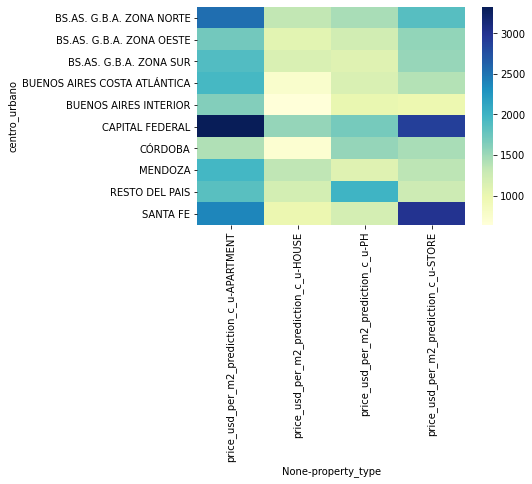

In [471]:
pivot_c_u = data.pivot_table(index='centro_urbano', columns='property_type', aggfunc={'price_usd_per_m2_prediction_c_u':'mean'}).round(2)
sns.heatmap(pivot_c_u, cmap="YlGnBu");

#### Imputamos eliminando outliers POR GRUPO 'centro_urbano-tipo' previamente

[volver a TOC](#section_toc)

Realizaremos la imputación de datos eliminando outiers por grupo. De esta forma se tendrá un valor más exacto a l momento de imputar y no se encontrará afecta por los outliers.

In [472]:
# Calculadora de rango de ouliers por grupo:

def found_limits(series_values):
    #print(series_values)
    q1 = series_values.quantile(0.25)
    q2 = series_values.quantile(0.50)
    q3 = series_values.quantile(0.75)
    #Rango intercuartil
    iqr = (q3 - q1) * 1.5
    up_threshold = q3 + iqr
    low_threshold = q1 - iqr
    return(q1 - iqr,q3 + iqr)

def limits_low_up(groupby):
    groupby_series = pd.Series(groupby)
    #groupby_series = pd.Series(groupby.index)    Franco habia puesto esto.
    #print(groupby_series)
    (limit_min, limit_max) = found_limits(groupby_series)
    return [limit_min,limit_max]

group_by_range_outliers = data.groupby(['centro_urbano','property_type'])['price_usd_per_m2'].apply(limits_low_up).to_frame()

In [473]:
# Asignación de rangos a cada grupo como columna nueva:

def range_assigned(row):
    create_tuple = (row['centro_urbano'],row['property_type'])
    return group_by_range_outliers.loc[create_tuple]
    
data['range_outliers'] = data.apply(range_assigned,axis=1)

In [474]:
data[['price_usd_per_m2','range_outliers']].sample(10)  # Vemos que tenemos la nueva columna. evaluaremos si el valor cae dentro del límite indicado por la nueva columna.

,price_usd_per_m2,range_outliers
104615,1954.430909,"[606.7783598265896, 3235.932984104046]"
46168,NaN,"[126.14036325992834, 4599.640457368719]"
40566,1896.551724,"[460.79549381436163, 3168.5154468173337]"
34194,1980.000000,"[524.6398467432946, 4755.2298850574725]"
19519,1616.279070,"[602.2727272727284, 2729.5454545454527]"
66367,1271.929825,"[-657.4675324675329, 3095.7792207792218]"
48502,795.000000,"[-739.7289360578311, 2529.602698144526]"
21250,710.526316,"[-442.3076923076916, 3198.717948717948]"
115854,NaN,"[-851.1057022591647, 2132.197948209719]"
11749,2846.153846,"[524.6398467432946, 4755.2298850574725]"


In [475]:
# Identificador de outliers. Verifica si el valor cae dentro del rango o nó o si es NaN:

def see(x):
    if (pd.notnull(x[0])):
        return x[0]<x[1][1] and x[0]>x[1][0]
    else:
        return np.NaN

flag_serie = data[['price_usd_per_m2','range_outliers']].apply(lambda x: see(x),axis=1)

In [476]:
flag_serie.value_counts(dropna=False) # True cae dentro del rango, no es oulier. False es un outlier. NaN es nulo. En función de esto imputaremos

True     65251
NaN      52603
False     3366
dtype: int64

In [477]:
data['flag_serie'] = flag_serie  # Creamos una columna indicando si es outlier o no o NaN.

In [478]:
# Valores con datos sin ouliers:
data_sin_outliers = data[data.flag_serie == True]

In [479]:
# Valores con o sin datos pero sin ouliers:
data_con_sin_datos_sin_outliers = data[data.flag_serie != False]

In [480]:
# Valore nulos, sin outliers:
data_sin_datos_sin_outliers = data[data.flag_serie.isnull()]

#### Imputamos eliminando outliers previamente, por la media POR GRUPO 'centro_urbano-tipo'

[volver a TOC](#section_toc)

In [481]:
# Creamos columnas nuevas donde almacenamos los valores predecidos:
data_con_sin_datos_sin_outliers["price_usd_per_m2_prediction_mean_c_u"] = data_con_sin_datos_sin_outliers.groupby(['centro_urbano','property_type'])['price_usd_per_m2'].transform('mean')

C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [482]:
# Vemos los datos cómo se rellenarán:
data_con_sin_datos_sin_outliers[['price_usd_per_m2', "price_usd_per_m2_prediction_mean_c_u"]]

,price_usd_per_m2,price_usd_per_m2_prediction_mean_c_u
0,1127.272727,1662.882761
1,NaN,1810.509310
2,1309.090909,2555.015443
3,NaN,1662.882761
4,1828.571429,1919.173830
...,...,...
121214,NaN,1519.165265
121216,1383.333333,1239.067918
121217,2858.695652,2555.015443
121218,1997.916667,1919.173830


In [483]:
# Guardamos el valor de la media en los valores NaN:
data_con_sin_datos_sin_outliers.loc[data_con_sin_datos_sin_outliers['price_usd_per_m2'].isnull(),'price_usd_per_m2'] = data['price_usd_per_m2_prediction_mean_c_u']

C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [484]:
# Vemos que no qedaron valores nulos:
data_con_sin_datos_sin_outliers['price_usd_per_m2'].isnull().sum()

0

In [485]:
# Pivot de la data imputada:
data_con_sin_datos_sin_outliers.pivot_table(index='centro_urbano', columns='property_type', aggfunc={'price_usd_per_m2':'mean'}).round(2)

price_usd_per_m2                           
property_type                       APARTMENT    HOUSE       PH    STORE
centro_urbano                                                           
BS.AS. G.B.A. ZONA NORTE              2415.09  1271.87  1406.77  1660.55
BS.AS. G.B.A. ZONA OESTE              1698.47   995.64  1145.42  1378.43
BS.AS. G.B.A. ZONA SUR                1848.09  1145.28  1095.67  1417.67
BUENOS AIRES COSTA ATLÁNTICA          1933.87   733.62  1128.90  1303.53
BUENOS AIRES INTERIOR                 1633.84   624.58  1019.89   987.67
CAPITAL FEDERAL                       2773.03  1402.96  1672.97  2667.59
CÓRDOBA                               1421.03   696.65  1455.02  1445.00
MENDOZA                               1762.21  1196.57  1113.72  1361.58
RESTO DEL PAIS                        1759.30  1101.48  2000.54  1245.73
SANTA FE                              2111.11   916.28  1220.38  2633.94

In [486]:
# Pivot de la data sin outliers ni nulos (limpios):
data_sin_outliers.pivot_table(index='centro_urbano', columns='property_type', aggfunc={'price_usd_per_m2':'mean'}).round(2)

price_usd_per_m2                           
property_type                       APARTMENT    HOUSE       PH    STORE
centro_urbano                                                           
BS.AS. G.B.A. ZONA NORTE              2358.06  1239.07  1380.51  1519.17
BS.AS. G.B.A. ZONA OESTE              1673.40   903.00  1092.91  1122.38
BS.AS. G.B.A. ZONA SUR                1810.51  1112.84  1066.33  1252.59
BUENOS AIRES COSTA ATLÁNTICA          1919.17   724.72  1112.11  1195.51
BUENOS AIRES INTERIOR                 1633.55   604.96  1019.89   987.67
CAPITAL FEDERAL                       2555.02  1322.68  1662.88  2547.95
CÓRDOBA                               1411.12   642.34   873.80  1401.21
MENDOZA                               1574.88   954.66  1113.72  1361.58
RESTO DEL PAIS                        1560.30   876.18  2000.54  1211.63
SANTA FE                              1680.18   752.90  1289.61  1534.44

---
<a id="section_expensas"></a> 
##  Diagrama de expensas para los valores existentes

[volver a TOC](#section_toc)

Si bien las expensas tienen valores faltantes, en función de la provincia y tipo de casa nos puede dar una idea de los impuestos en dicha categoría.

In [487]:
# Podríamos analizar las expensas de solo los elementos que tienen el dato para sacar alguna inferencia en general.
#my_info_columnas(data)
my_columna_valores(data, col='expenses')

Columna: expenses
Cantidad de elementos únicos:  983
NaN        106958
1.0          1028
1000.0        627
1500.0        617
2000.0        561
            ...  
1935.0          1
22762.0         1
2472.0          1
1883.0          1
11920.0         1
Name: expenses, Length: 983, dtype: int64


Vemos que expenses es uno de los datos con mas valores NaN.

Pero si solo analizamos los que tengan valor podemos tener una idea del costo de las expensas por esa region y tipo de propiedad

In [488]:
# Veamos su % de nulos por CADA GRUPO provincia-tipo para tener un noción de valores faltantes:
data.groupby(['state_name', 'property_type']).apply(lambda x: (x['expenses'].isnull().sum()/len(x)*100).round(2))

state_name                property_type
BS.AS. G.B.A. ZONA NORTE  APARTMENT         84.75
                          HOUSE             89.94
                          PH                95.63
                          STORE             87.44
BS.AS. G.B.A. ZONA OESTE  APARTMENT         86.62
                                            ...  
TIERRA DEL FUEGO          STORE            100.00
TUCUMÁN                   APARTMENT         86.35
                          HOUSE             87.38
                          PH                75.00
                          STORE             87.10
Length: 98, dtype: float64

In [489]:
# Realizamos una sumarizada:
data.pivot_table(index = 'state_name', columns = 'property_type', aggfunc = {'expenses' : 'mean'}).round(2)

expenses                             
property_type                APARTMENT      HOUSE       PH    STORE
state_name                                                         
BS.AS. G.B.A. ZONA NORTE       3021.64    5869.71   613.98  1564.11
BS.AS. G.B.A. ZONA OESTE       2818.10    3641.73   266.06  1190.82
BS.AS. G.B.A. ZONA SUR         1503.66    4589.92   462.49  1203.21
BUENOS AIRES COSTA ATLÁNTICA   2042.12    3284.69   718.57  2201.57
BUENOS AIRES INTERIOR           891.92    4508.27   620.00      NaN
...                                ...        ...      ...      ...
SAN LUIS                        783.33    3801.00      NaN      NaN
SANTA FE                       1429.94  107839.43   520.00   812.22
SANTIAGO DEL ESTERO                NaN       1.00      NaN      NaN
TIERRA DEL FUEGO                   NaN     300.00      NaN      NaN
TUCUMÁN                        2023.41    2679.63  1500.00  4516.25

[23 rows x 4 columns]

Podemos ver que en Mendoza y Salta tienen un valor exageradamente alto para expensas. Veremos dichos outliers:

In [490]:
# Analizamos Mendoza en particular los apartment que tienen la mayor expensa:
data_mendoza = data.loc[(data['state_name'] == 'MENDOZA') & (data['property_type'] == 'APARTMENT'), :]  
data_mendoza['expenses'].describe()

count         28.00
mean      108040.00
std       298288.28
min          250.00
25%          600.00
50%         2100.00
75%         6250.00
max      1200000.00
Name: expenses, dtype: float64

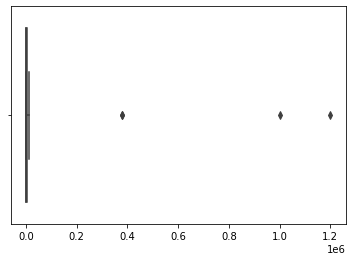

In [491]:
# Veamos su boxplot:
sns.boxplot(x=data_mendoza['expenses'].values);

Vemos que tiene outliers importantes. Los eliminaremos y volvemos a graficar:

In [492]:
# Buscamos outliers:
serie_mendoza_expenses = data_mendoza['expenses']  # Serie de la columna Mendoza
q1 = serie_mendoza_expenses.quantile(0.25)
q2 = serie_mendoza_expenses.quantile(0.50)
q3 = serie_mendoza_expenses.quantile(0.75)

#Rango intercuartil:
iqr = (q3 - q1) * 1.5

#Umbrales:
up_threshold = q3 + iqr
low_threshold = q1 - iqr

print("Límite superior: ", up_threshold)
print("Límite inferior:", low_threshold)

Límite superior:  14725.0
Límite inferior: -7875.0


In [493]:
# Máscaras para filtrar outliers
outlier_mask = np.logical_or(serie_mendoza_expenses>up_threshold, serie_mendoza_expenses<low_threshold)  # Máscara para detectar outliers.
not_outlier_mask = np.logical_not(outlier_mask)                                                          # Máscara para NO outliers.

In [494]:
# Los outliers son:
outliers_expenses_mendoza = serie_mendoza_expenses[outlier_mask]
outliers_expenses_mendoza

88456     380000.0
88474     380000.0
92775    1000000.0
96364    1200000.0
Name: expenses, dtype: float64

In [495]:
# Filtramos no_outliers y vemos los parámetros:
no_outliers_expenses_mendoza = serie_mendoza_expenses[not_outlier_mask]
no_outliers_expenses_mendoza.describe()

count       24.000000
mean      2713.333333
std       2996.506178
min        250.000000
25%        550.000000
50%       1200.000000
75%       4000.000000
max      10500.000000
Name: expenses, dtype: float64

Vemos como mejoró la media del grupo.

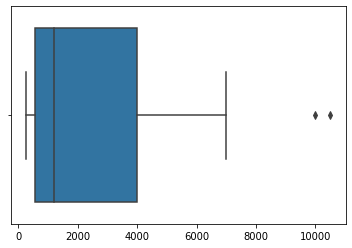

In [496]:
# Graficamos nuevamente los valores ahora sin outliers:
sns.boxplot(x = no_outliers_expenses_mendoza.values);

In [497]:
# Borramos los outliers de la serie entonces.
serie_mendoza_expenses[outlier_mask] = np.nan   # Asigno NaN a los outliers
serie_mendoza_expenses[outlier_mask]

C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


88456   NaN
88474   NaN
92775   NaN
96364   NaN
Name: expenses, dtype: float64

In [498]:
# Si desearíamos rellenar los NaN con la media sin outlier debemos realizar un fillna de la media
#no_outliers_expenses_mendoza_mean = no_outliers_expenses_mendoza.mean().round(2)
#serie_mendoza_expenses.fillna(no_outliers_expenses_mendoza_mean, inplace=True)

In [499]:
# Guardamos la modificación en el dataframe original:
data.loc[(data['state_name'] == 'MENDOZA') & (data['property_type'] == 'APARTMENT'), 'expenses'] = serie_mendoza_expenses

# Volvemos arealizar la sumarizada y vemos lo datos de Mendoza:
# Realizamos una sumarizada:
data.pivot_table(index = 'state_name', columns = 'property_type', aggfunc = {'expenses' : 'mean'}).round(2)

expenses                             
property_type                APARTMENT      HOUSE       PH    STORE
state_name                                                         
BS.AS. G.B.A. ZONA NORTE       3021.64    5869.71   613.98  1564.11
BS.AS. G.B.A. ZONA OESTE       2818.10    3641.73   266.06  1190.82
BS.AS. G.B.A. ZONA SUR         1503.66    4589.92   462.49  1203.21
BUENOS AIRES COSTA ATLÁNTICA   2042.12    3284.69   718.57  2201.57
BUENOS AIRES INTERIOR           891.92    4508.27   620.00      NaN
...                                ...        ...      ...      ...
SAN LUIS                        783.33    3801.00      NaN      NaN
SANTA FE                       1429.94  107839.43   520.00   812.22
SANTIAGO DEL ESTERO                NaN       1.00      NaN      NaN
TIERRA DEL FUEGO                   NaN     300.00      NaN      NaN
TUCUMÁN                        2023.41    2679.63  1500.00  4516.25

[23 rows x 4 columns]

Si realizamos esto mismo para Santa Fe podremos obtener una idea de los valores aproximados de los costos de expesas por provincia y tipo de propiedad.

---
<a id="section_categorizacion"></a> 
##  Gráficos variables categóricas

[volver a TOC](#section_toc)

#### Proporción de inmuebles por tipo

[volver a TOC](#section_toc)

Es importante saber la cproporción de inmuebles que maneja la inmobiliaria.

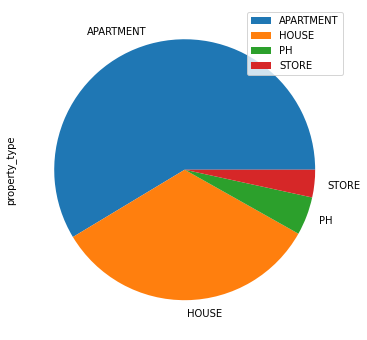

In [500]:
serie_pie = data.groupby('property_type')['property_type'].count().to_frame().plot(kind='pie', subplots=True, figsize=(6, 6))

# Como tenemos el tema de jupyter en negro no se ven las series.

#### Cantidad de inmuebles por región

[volver a TOC](#section_toc)

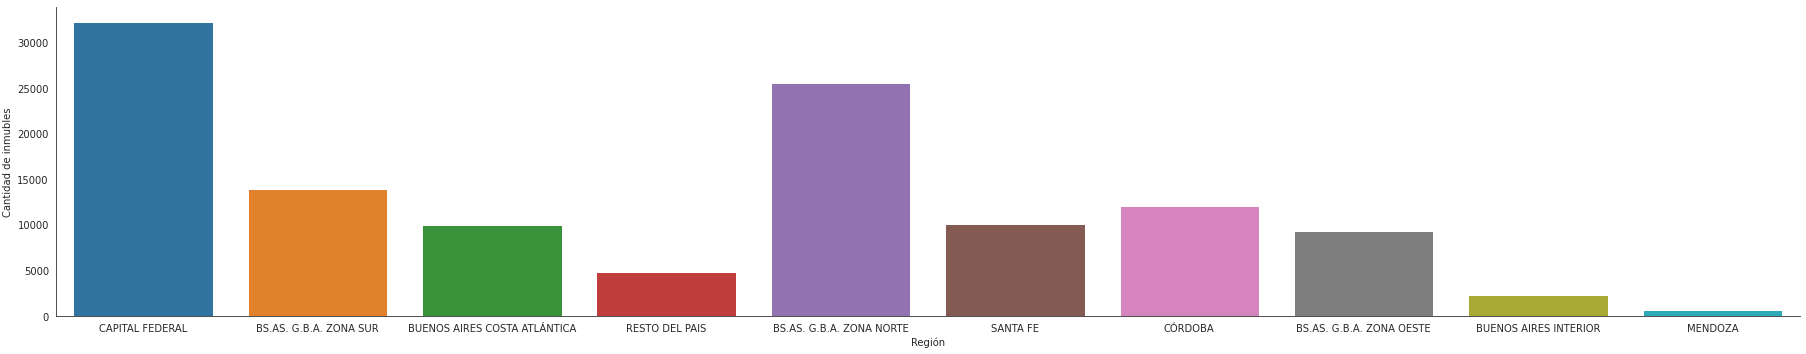

In [501]:
with sns.axes_style('white'):
    g = sns.catplot('centro_urbano', data=data, aspect=5, kind='count')
    g.set_axis_labels('Región', 'Cantidad de inmubles')   

#### Cantidad de inmuebles por tipo y región

[volver a TOC](#section_toc)

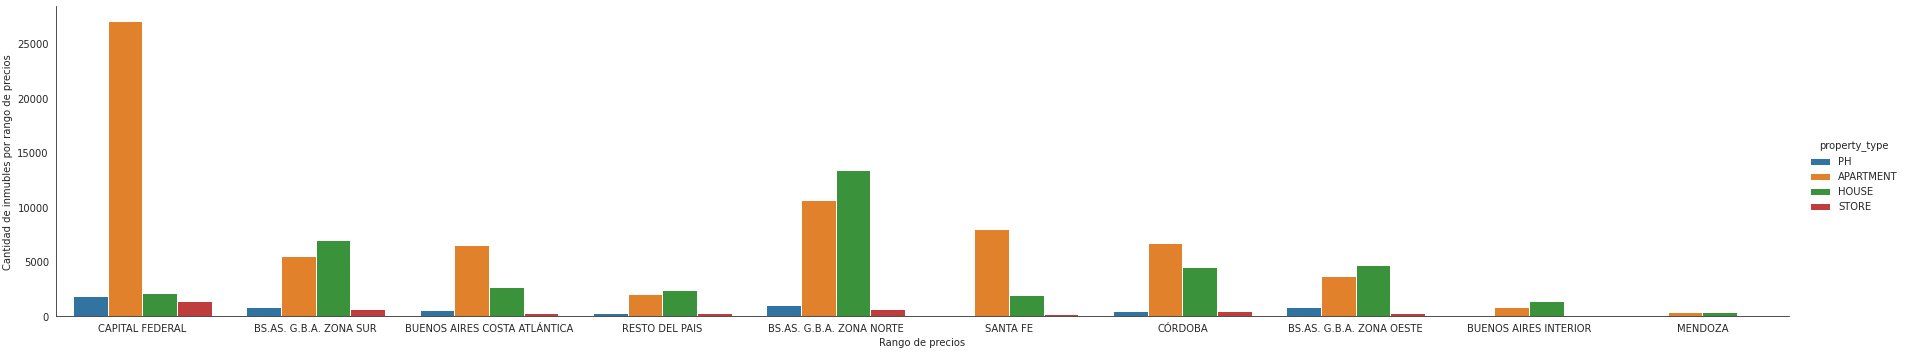

In [502]:
with sns.axes_style('white'):
    g = sns.catplot('centro_urbano', data=data, aspect=5, kind='count', hue='property_type') #order=range(2001, 2015)) # Ver que recibe un dataframe.
                                                                                                                # kind = count es barras. aspect es el tamaño del gráfico.
                                                                                                                # hue es la categoría/serie. order es el rango eje X.
    g.set_axis_labels('Rango de precios', 'Cantidad de inmubles por rango de precios')                                                               # Etiqueta eje Y.

#### Cantidad de inmubles por rango de precios y tipo de inmueble - Categorización de los precios

[volver a TOC](#section_toc)

Sería buena idea graficar en un diagrama de barras, cuántos inmuebles tenemos por tipo y por rango de precios.

Categorizamos a los precios de los inmuebles mediante intervalos, para tener una noción del rango de precios que maneja la inmobiliaria.

In [503]:
price_usd_cat, x_bins = pd.qcut(data.price_aprox_usd, 10, retbins=True)  # Devuelve serie categorizada en función de los cuartiles.
data['price_usd_cat'] = price_usd_cat                                    # Pegamos la categorización al df.

print(x_bins)                                                            # Son los intervalos creados percentiles.

[       0.      65000.      81600.      98146.43   120000.     145000.
   179000.     231027.3    310000.     470000.   46545445.  ]


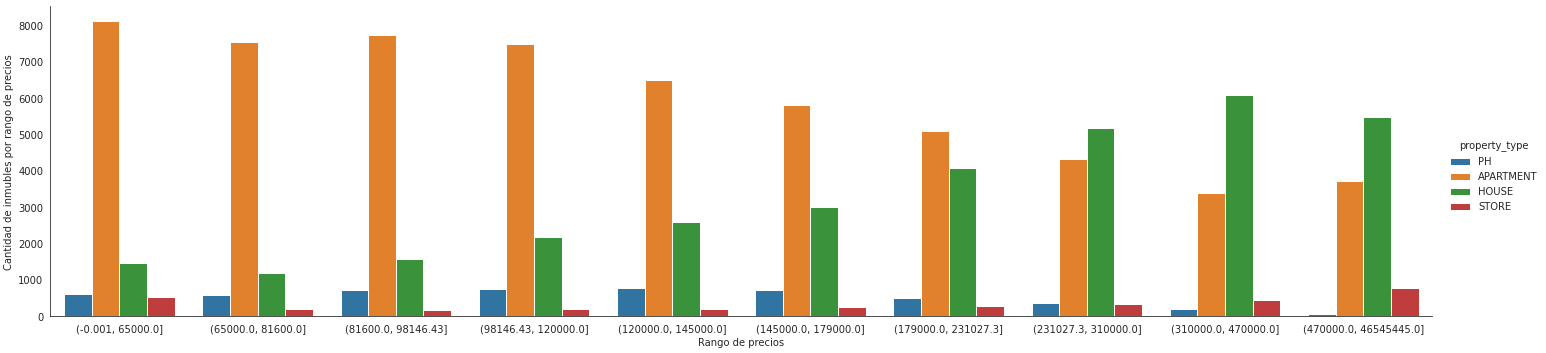

In [504]:
with sns.axes_style('white'):
    g = sns.catplot('price_usd_cat', data=data, aspect=4.0, kind='count', hue='property_type') #order=range(2001, 2015)) # Ver que recibe un dataframe.
                                                                                                                # kind = count es barras. aspect es el tamaño del gráfico.
                                                                                                                # hue es la categoría/serie. order es el rango eje X.
    g.set_axis_labels('Rango de precios', 'Cantidad de inmubles por rango de precios')                                                               # Etiqueta eje Y.

In [505]:
# Verificamos algunos de los grupos.
data.loc[data.price_aprox_usd>470000, 'property_type'].count()

10011

---
<a id="section_graficos"></a> 
##  Gráficos variables contínua

[volver a TOC](#section_toc)

La idea de esta sección es sacar algunas conclusiones sobre los campos calculados e imputados del dataset por medio de gráficos de las variables contínuas.

#### Boxplot distibución de precios por centro_urbano y por tipo

[volver a TOC](#section_toc)

Si graficamos la información sin limpiarla podemos ver la cantidad de outliers:

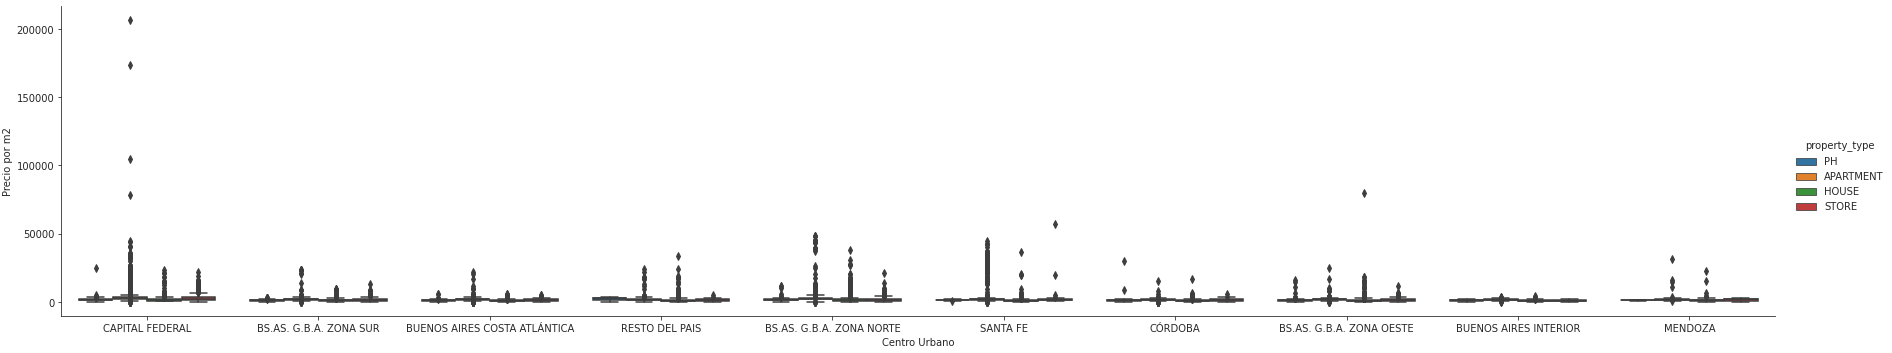

In [506]:
# Gráfico de distribución caja con bigotes con CATPLOT:
with sns.axes_style(style='ticks'):
    g = sns.catplot("centro_urbano", "price_usd_per_m2",'property_type' , data=data, kind="box", aspect=5.0)   
                        # Si queremos aplicar algun filtro:               data.loc[(data['property_type'] == 'HOUSE') & (data['centro_urbano'] != 'CAPITAL FEDERAL'), :]
    g.set_axis_labels("Centro Urbano", "Precio por m2"); 

Si graficamos sin outlers:

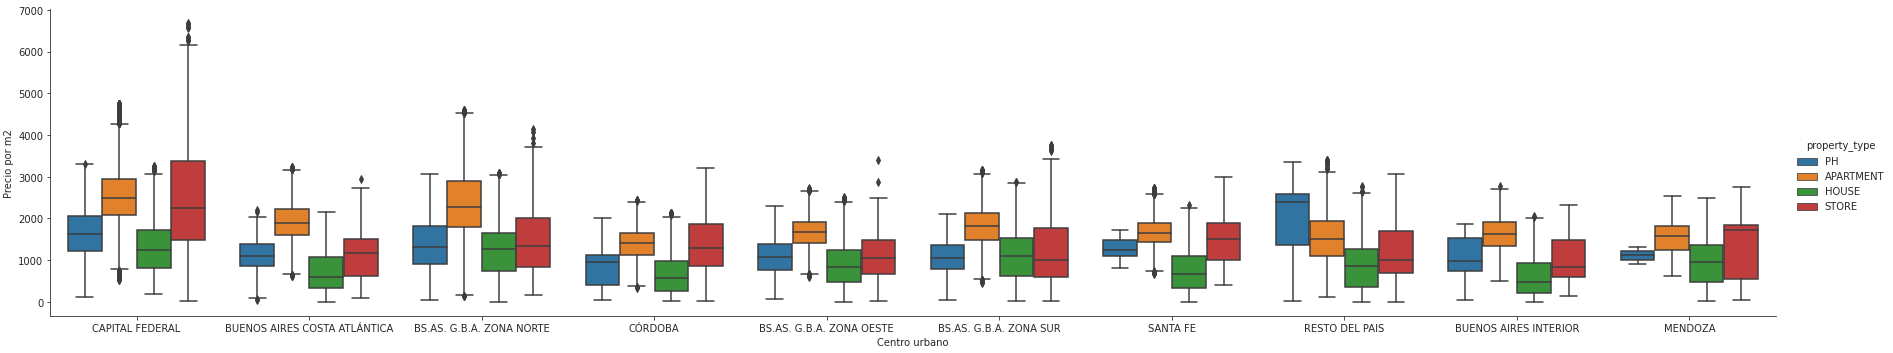

In [507]:
# Gráfico de distribución caja con bigotes con CATPLOT:
with sns.axes_style(style='ticks'):
    g = sns.catplot("centro_urbano", "price_usd_per_m2",'property_type', data=data_sin_outliers, kind="box", aspect=5.0)    
    g.set_axis_labels("Centro urbano", "Precio por m2");

Si deseamos ser solo una serie:

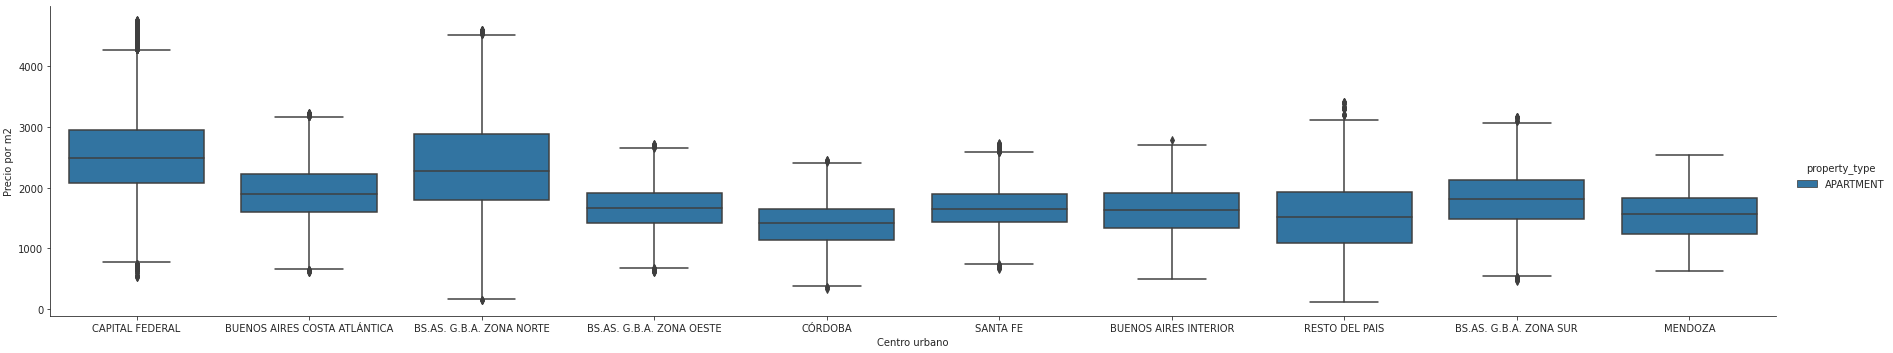

In [508]:
# Gráfico de distribución caja con bigotes con CATPLOT:
with sns.axes_style(style='ticks'):
    g = sns.catplot("centro_urbano", "price_usd_per_m2",'property_type', data=data_sin_outliers[data_sin_outliers['property_type'] == 'APARTMENT'], kind="box", aspect=5.0)    
    g.set_axis_labels("Centro urbano", "Precio por m2");

#### Scatertplots

[volver a TOC](#section_toc)

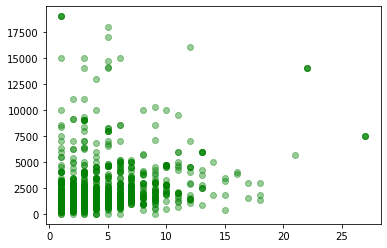

In [509]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(data['floor'], data['expenses'], marker = 'o', color = "green", alpha = 0.4)

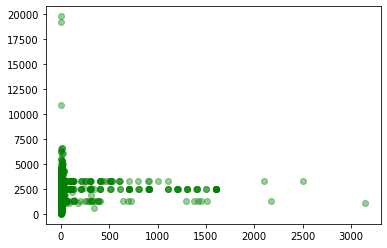

In [510]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(data['floor'], data['price_usd_per_m2_prediction'], marker = 'o', color = "green", alpha = 0.4)

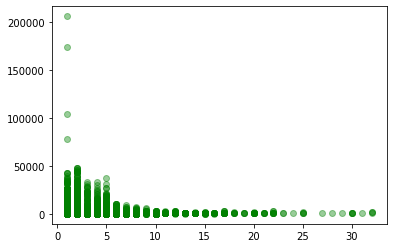

In [511]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.scatter(data['rooms'], data['price_usd_per_m2_prediction_c_u'], marker = 'o', color = "green", alpha = 0.4)

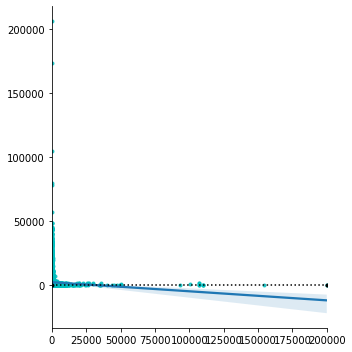

In [512]:
g = sns.lmplot('surface_total_in_m2', 'price_usd_per_m2_prediction_c_u', data=data, markers=".", scatter_kws=dict(color='c'))   # X, Y. Col es la categorización. Set de datos dataframe.
g.map(plt.axhline, y=0.1, color="k", ls=":");                                                                  # Solo dibuja una línea de referencia. 

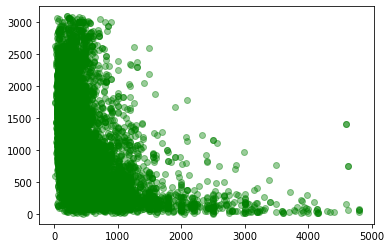

In [513]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
data_ok = data_sin_outliers.loc[(data_sin_outliers['property_type'] == 'HOUSE') & (data_sin_outliers['centro_urbano'] != 'CAPITAL FEDERAL') & (data_sin_outliers['surface_total_in_m2'] < 5000), :]
ax.scatter(data_ok['surface_total_in_m2'], data_ok['price_usd_per_m2'], marker = 'o', color = "green", alpha = 0.4)

---
<a id="section_desafio_2"></a> 
##  Archivo para desafío 2

[volver a TOC](#section_toc)

De cara al desafío 2, editaremos algunas variables necesarias y exportaremos el archivo necesario que utilizaremos en el próximo desafío.

Nos parece conveniente trabajar con los datos originales sin outliers, de esta manera no introduciremos errores al modelo de predicción lineal del próximo desafío.

A su vez eliminamos algunas columnas y generamos algunas nuevas que pueden estar relacionadas con el precio y nos podrán de ser de gran ayuda al momento de la predicción.

#### Amenities

[volver a TOC](#section_toc)

Imputamos amenities a partir de la columna descripción. Elegimos las siguientes:
 * Pileta
 * Parrilla
 * Quincho
 * Balcón
 * Patio

In [554]:
# El dataset a utilzar, como mencionamos, será el de data_sin_outliers.
print("Dimensiones del data set data_sin_outliers: ", data_sin_outliers.shape)

Dimensiones del data set data_sin_outliers:  (65251, 38)


Usamos regex para calcular los amenities:

In [538]:
# Esta función devuelve 0 o 1 si encuentra un match con el patrón. Recibe el patrón y el valor de la columns:
def match_pattern(text, amenity_pattern):
    if text is not np.nan:
        m = re.search(amenity_pattern, text, re.I)  # Este re.I sgnifica que no distinga entre mayúsculas y minúsculas
        if m is not None:
            return 1
    return 0

# Pasa a la función de arriba el patrón y el valor de la columna que está analizando.
def match_amenity_pileta(text):
    return match_pattern(text, "pileta|swimming pool|piscina|picina|pisina|jacuzzi|jacuzi")

def match_amenity_parrilla(text):
    return match_pattern(text, "parrilla|parrila|orno de barro|barbecue|asador")

def match_amenity_quincho(text):
    return match_pattern(text, "quincho")

def match_amenity_patio(text):
    return match_pattern(text, "patio|jardin|jardín|con parque|parque con|lindo parque|parque compartido|parque arbolado")

def match_amenity_cochera(text):
    return match_pattern(text, "cochera|garage")

def match_amenity_balcon(text):
    return match_pattern(text, "balcon|balcón")

In [537]:
data_sin_outliers["pileta"] = data_sin_outliers['description'].map(match_amenity_pileta)
print("Total de \"{0}\" imputados: {1}".format("pileta", data_sin_outliers["pileta"].sum()))

data_sin_outliers["parrilla"] = data_sin_outliers['description'].map(match_amenity_parrilla)
print("Total de \"{0}\" imputados: {1}".format("parrilla", data_sin_outliers["parrilla"].sum()))

data_sin_outliers["quincho"] = data_sin_outliers['description'].map(match_amenity_quincho)
print("Total de \"{0}\" imputados: {1}".format("quincho", data_sin_outliers["quincho"].sum()))

data_sin_outliers["patio"] = data_sin_outliers['description'].map(match_amenity_patio)
print("Total de \"{0}\" imputados: {1}".format("patio", data_sin_outliers["patio"].sum()))

data_sin_outliers["cochera"] = data_sin_outliers['description'].map(match_amenity_cochera)
print("Total de \"{0}\" imputados: {1}".format("cochera", data_sin_outliers["cochera"].sum()))

data_sin_outliers["balcon"] = data_sin_outliers['description'].map(match_amenity_balcon)
print("Total de \"{0}\" imputados: {1}".format("balcon", data_sin_outliers["balcon"].sum()))

data_sin_outliers['amenities'] = data_sin_outliers['pileta'] + data_sin_outliers['parrilla'] + data_sin_outliers['quincho'] + data_sin_outliers['patio'] + data_sin_outliers['cochera'] + data_sin_outliers['balcon']

C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total de "pileta" imputados: 19019


C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Total de "parrilla" imputados: 22383


C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Total de "quincho" imputados: 6087


C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Total de "patio" imputados: 19508


C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Total de "cochera" imputados: 27395
Total de "balcon" imputados: 25022


C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Alan\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [552]:
# Vemos cómo quedaron los datos:
data_sin_outliers.head()

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,rooms_regex_title,price_usd_per_m2_prediction_median,price_usd_per_m2_prediction_mean,price_usd_per_m2_prediction,centro_urbano,price_usd_per_m2_prediction_mean_c_u,price_usd_per_m2_prediction_c_u,range_outliers,flag_serie,pileta,parrilla,quincho,patio,cochera,balcon,amenities
0,PH,MATADEROS,|ARGENTINA|CAPITAL FEDERAL|MATADEROS|,CAPITAL FEDERAL,3430787.0,-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15BO8_VENTA_PH_MAT...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,HTTPS://THUMBS4.PROPERATI.COM/8/BLUUYIHJLHGIIK...,2.0,1625.000000,1695.517729,1127.272727,CAPITAL FEDERAL,1695.517729,1127.272727,"[-32.67973856209187, 3313.7254901960796]",True,0,0,0,1,0,0,1
2,APARTMENT,MATADEROS,|ARGENTINA|CAPITAL FEDERAL|MATADEROS|,CAPITAL FEDERAL,3430787.0,-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOD_VENTA_DEPART...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,HTTPS://THUMBS4.PROPERATI.COM/5/SXKR34F_IWG3W_...,2.0,2566.046646,3324.464870,1309.090909,CAPITAL FEDERAL,3324.464870,1309.090909,"[524.6398467432946, 4755.2298850574725]",True,0,0,0,0,0,0,0
4,APARTMENT,CENTRO,|ARGENTINA|BUENOS AIRES COSTA ATLÁNTICA|MAR DE...,BUENOS AIRES COSTA ATLÁNTICA,3435548.0,-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,2.0,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOK_VENTA_DEPART...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,HTTPS://THUMBS4.PROPERATI.COM/5/XRRQLNCSI_VS-F...,2.0,1897.500000,1958.838430,1828.571429,BUENOS AIRES COSTA ATLÁNTICA,1958.838430,1828.571429,"[606.7783598265896, 3235.932984104046]",True,0,0,0,0,0,0,0
6,PH,MUNRO,|ARGENTINA|BS.AS. G.B.A. ZONA NORTE|VICENTE LÓ...,BS.AS. G.B.A. ZONA NORTE,3430511.0,-34.532957,-58.521782,130000.0,USD,2293785.0,130000.0,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOR_VENTA_PH_MUN...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",HTTPS://THUMBS4.PROPERATI.COM/5/6GOXSHCYDU1AGX...,NaN,1325.581395,1451.712566,1226.415094,BS.AS. G.B.A. ZONA NORTE,1451.712566,1226.415094,"[-442.3076923076916, 3198.717948717948]",True,0,0,0,1,0,0,1
7,APARTMENT,BELGRANO,|ARGENTINA|CAPITAL FEDERAL|BELGRANO|,CAPITAL FEDERAL,3436077.0,-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,HTTP://WWW.PROPERATI.COM.AR/15BOT_VENTA_DEPART...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,HTTPS://THUMBS4.PROPERATI.COM/1/IHXARYNLR8SPEW...,NaN,2566.046646,3324.464870,3066.666667,CAPITAL FEDERAL,3324.464870,3066.666667,"[524.6398467432946, 4755.2298850574725]",True,1,0,0,0,0,0,1


In [556]:
# Eliminamos ciertas variables que no serán utilizadas en el modelo:
data_modelo = data_sin_outliers.drop(['place_with_parent_names', 'geonames_id', 'lat', 'lon', 'currency', 'price_aprox_local_currency', 'price', 'properati_url',
                                      'rooms_regex_title', 'title', 'description', 'image_thumbnail', 'price_usd_per_m2_prediction_median', 
                                      'price_usd_per_m2_prediction_mean', 'price_usd_per_m2_prediction_c_u',
                                      'price_usd_per_m2_prediction', 'price_usd_per_m2_prediction_mean_c_u', 'range_outliers', 'flag_serie'], axis = 'columns')

In [557]:
data_modelo.head()

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,centro_urbano,pileta,parrilla,quincho,patio,cochera,balcon,amenities
0,PH,MATADEROS,CAPITAL FEDERAL,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,1,0,0,1
2,APARTMENT,MATADEROS,CAPITAL FEDERAL,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,CAPITAL FEDERAL,0,0,0,0,0,0,0
4,APARTMENT,CENTRO,BUENOS AIRES COSTA ATLÁNTICA,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,2.0,NaN,BUENOS AIRES COSTA ATLÁNTICA,0,0,0,0,0,0,0
6,PH,MUNRO,BS.AS. G.B.A. ZONA NORTE,130000.0,106.0,78.0,1226.415094,1666.666667,NaN,NaN,NaN,BS.AS. G.B.A. ZONA NORTE,0,0,0,1,0,0,1
7,APARTMENT,BELGRANO,CAPITAL FEDERAL,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,CAPITAL FEDERAL,1,0,0,0,0,0,1


In [559]:
# Eliminamos filas duplicadas:
data_modelo.drop_duplicates(subset = ['property_type', 'place_name', 'state_name', 'price_aprox_usd', 
                                                          'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
                                                          'price_per_m2', 'floor', 'rooms', 'expenses', 'centro_urbano', 'pileta',
                                                          'parrilla', 'quincho', 'patio', 'cochera', 'balcon', 'amenities'], keep="first", inplace=True)

In [563]:
print("Data oroginal: ", data_sin_outliers.shape)
print("Data sin duplicados: ", data_modelo.shape)

Data oroginal:  (65251, 38)
Data sin duplicados:  (60678, 19)


In [564]:
# Exportamos el archivo listo para el desafío 2:
data_modelo.to_csv('properati_desafio_2.csv', sep=',', index=False)